# Import Package

In [1]:
#Library

#Basic data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics
from scipy.stats import normaltest, norm
from scipy import stats

#Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

#Algorithm models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


#Metric evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

#Other
from jupyterthemes import jtplot

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
jtplot.style(theme='grade3')

# Import Data

In [4]:
df=pd.read_csv('df_predict.csv',low_memory=False)
df

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
0,ROW W/GAR 3 STY MASONRY,Single Family,N,49.0,5.0,0,15.90,5.0,108 WHARTON ST,186800.0,2.0,4.0,7.0,3.0,N,11000600,E,1951-01-31,1.0,ST,F,779.0,1650.0,F,I,1920.0,19147,RSA5,Residential Single Family,1951.0,1955-1951,1,5.0,100.0
1,ROW 3 STY MASONRY,Single Family,Y,49.0,2.0,0,15.90,2.0,110 WHARTON ST,341600.0,1.0,3.0,4.0,3.0,N,11000700,E,2017-04-14,395000.0,ST,F,779.1,1203.0,F,I,1920.0,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,2.0,100.0
2,ROW 3 STY MASONRY,Single Family,N,49.0,4.0,0,14.80,4.0,112 WHARTON ST,226200.0,1.0,4.0,5.0,2.0,N,11000800,E,1975-09-04,1.0,ST,F,725.2,1482.0,F,I,1920.0,19147,RSA5,Residential Single Family,1975.0,1975-1971,0,4.0,100.0
3,ROW 3 STY MASONRY,Single Family,Y,100.0,4.0,0,14.33,4.0,114 WHARTON ST,241500.0,2.0,4.0,8.0,2.0,N,11000900,E,2012-02-16,1.0,ST,F,1433.0,2049.0,F,I,1920.0,19147,RSA5,Residential Single Family,2012.0,2015-2011,0,4.0,100.0
4,ROW 3 STY MASONRY,Single Family,N,100.0,4.0,0,15.00,4.0,116 WHARTON ST,237000.0,2.0,4.0,6.0,3.0,N,11001000,E,2017-07-21,1.0,ST,F,1500.0,1155.0,F,I,1920.0,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495385,RES CONDO 3 STY MAS+OTH,Single Family,Y,62.0,1.0,0,16.80,1.0,1401 N 2ND ST,344900.0,3.0,3.0,6.0,3.0,N,888181016,E,2015-05-15,365000.0,ST,F,1041.6,1854.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495386,RES CONDO 3 STY MAS+OTH,Single Family,Y,62.0,1.0,0,16.80,1.0,1401 N 2ND ST,349500.0,2.0,3.0,5.0,3.0,N,888181018,E,2015-05-20,369000.0,ST,F,1041.6,1571.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495387,RES CONDO 3 STY MAS+OTH,Single Family,Y,45.0,1.0,0,18.00,1.0,1306 HOPE ST,240000.0,1.0,2.0,4.0,3.0,N,888181020,E,2015-09-04,255000.0,ST,F,810.0,1041.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495388,RES CONDO 3 STY MAS+OTH,Single Family,Y,45.0,1.0,0,18.00,1.0,1306 HOPE ST,288200.0,1.0,2.0,4.0,3.0,N,888181022,E,2018-12-14,324500.0,ST,F,810.0,1134.0,F,I,2015.0,19122,RSA5,Residential Single Family,2018.0,2020-2016,1,1.0,5.0


In [5]:
df['zip_code']=df['zip_code'].apply(lambda x: str(x))

In [6]:
df_describe =[]

for i in df.columns:
    df_describe.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique()
    ])

In [7]:
# Data description
desc=pd.DataFrame(df_describe, columns=['column','type','nan','nan%','nunique','unique'])
desc

,column,type,nan,nan%,nunique,unique
0,building_code_description,object,0,0.0,444,"[ROW W/GAR 3 STY MASONRY, ROW 3 STY MASONRY, R..."
1,category_code_description,object,0,0.0,6,"[Single Family, Multi Family, Commercial, Mixe..."
2,central_air,object,0,0.0,3,"[N, Y, 0]"
3,depth,float64,0,0.0,17825,"[49.0, 100.0, 90.0, 32.0, 60.0, 48.0, 45.46, 4..."
4,exterior_condition,float64,0,0.0,8,"[5.0, 2.0, 4.0, 3.0, 1.0, 6.0, 7.0, 0.0]"
5,fireplaces,object,0,0.0,5,"[0, 1, 2, 3, >3]"
6,frontage,float64,0,0.0,10866,"[15.9, 14.8, 14.33, 15.0, 29.17, 18.03, 18.05,..."
7,interior_condition,float64,0,0.0,8,"[5.0, 2.0, 4.0, 3.0, 1.0, 6.0, 7.0, 0.0]"
8,location,object,0,0.0,492389,"[108 WHARTON ST, 110 WHARTON ST, 112 WHARTON S..."
9,market_value,float64,0,0.0,14965,"[186800.0, 341600.0, 226200.0, 241500.0, 23700..."


# Feature Selection

## Based on Domain Knowledge
Feature selection in this part still based on domain knowledge. We need to check the meaning and the relevancy of every columns with the predictive target (market value of property). If there any columns that hasn't relationship with target, we will not use it in modelling.

### Numerical Feature

In [8]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O'] #list comprehention for selecting non object data type in dataframe
numerical_feature.remove('sale_price')
numerical_feature.remove('market_value')
print ('Number of numerical feature:' , len(numerical_feature))

df[numerical_feature].head()

Number of numerical feature: 15


,depth,exterior_condition,frontage,interior_condition,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,parcel_number,total_area,total_livable_area,year_built,sale_year,overall_condition,property_age
0,49.0,5.0,15.90,5.0,2.0,4.0,7.0,3.0,11000600,779.0,1650.0,1920.0,1951.0,5.0,100.0
1,49.0,2.0,15.90,2.0,1.0,3.0,4.0,3.0,11000700,779.1,1203.0,1920.0,2017.0,2.0,100.0
2,49.0,4.0,14.80,4.0,1.0,4.0,5.0,2.0,11000800,725.2,1482.0,1920.0,1975.0,4.0,100.0
3,100.0,4.0,14.33,4.0,2.0,4.0,8.0,2.0,11000900,1433.0,2049.0,1920.0,2012.0,4.0,100.0
4,100.0,4.0,15.00,4.0,2.0,4.0,6.0,3.0,11001000,1500.0,1155.0,1920.0,2017.0,4.0,100.0


Numerical feature after feature selection based on domain knowledge:
1. number_of_bedrooms
2. number_of_rooms
3. number_stories
4. overall_condition
5. property_age
6. sale_year
7. total_area
8. total_livable_area

We need to drop several columns because value from these columns can be represented by selected columns. Example:
1. overall_condition columns is the combination between exterior_condition and interior condition, overall_condition can represent value from exterior_condition and interior condition.
2. total_area values are multiplication value of depth and frontage, so total_area can represent value from depth and frontage.
3. property_age come from year_built column, so we choose property_age over year_built column since it contain similiar value.
4. we don't need parcel_number since it has many unique values.

### Categorical Feature

In [9]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes == 'O'] #list comprehention for selecting non object data type in dataframe
print ('Number of categorical feature:' , len(categorical_feature))

df[categorical_feature].head()

Number of categorical feature: 17


,building_code_description,category_code_description,central_air,fireplaces,location,other_building,parcel_shape,sale_date,street_designation,topography,unfinished,view_type,zip_code,zoning,new_zoning,sale_year_group,parking_spaces
0,ROW W/GAR 3 STY MASONRY,Single Family,N,0,108 WHARTON ST,N,E,1951-01-31,ST,F,F,I,19147,RSA5,Residential Single Family,1955-1951,1
1,ROW 3 STY MASONRY,Single Family,Y,0,110 WHARTON ST,N,E,2017-04-14,ST,F,F,I,19147,RSA5,Residential Single Family,2020-2016,0
2,ROW 3 STY MASONRY,Single Family,N,0,112 WHARTON ST,N,E,1975-09-04,ST,F,F,I,19147,RSA5,Residential Single Family,1975-1971,0
3,ROW 3 STY MASONRY,Single Family,Y,0,114 WHARTON ST,N,E,2012-02-16,ST,F,F,I,19147,RSA5,Residential Single Family,2015-2011,0
4,ROW 3 STY MASONRY,Single Family,N,0,116 WHARTON ST,N,E,2017-07-21,ST,F,F,I,19147,RSA5,Residential Single Family,2020-2016,0


In [10]:
df[categorical_feature].describe(include=object).T

,count,unique,top,freq
building_code_description,495390,444,ROW 2 STY MASONRY,176534
category_code_description,495390,6,Single Family,427156
central_air,495390,3,0,233117
fireplaces,495390,5,0,481781
location,495390,492389,112 N 2ND ST,183
other_building,495390,2,N,494609
parcel_shape,495390,5,E,457366
sale_date,495390,22535,1943-01-01,375
street_designation,495390,23,ST,364770
topography,495390,7,F,461324


Categorical feature after feature selection based on domain knowledge:
1. building_code_description
2. category_code_description
3. central_air
4. fireplaces
5. new_zoning
6. other_building
7. parcel_shape
8. parking_spaces
9. street_designation
10. topography
11. unfinished
12. view_type
13. zip_code 

Here is several columns that we drop:
1. location, because it contain many unique values.
2. sale_date and sale_year_group, because it contain many unique values and can be replace by sale_year value.
3. zoning, because we replace its values by create new_zoning columns.

## Based on EDA and Outlier Analysis

In this section, EDA has a purpose to clean the data for modelling. Different purpose from EDA in data analysis.

### Numerical Feature

In [11]:
# Check the data distribution of numerical features
a=[]
b=[]
c=[]
for feature in ['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','property_age',
                'sale_year','total_area','total_livable_area']:
    t,pval=normaltest(df[feature])
    a.append(feature)
    b.append(t)
    c.append(pval)
pd.DataFrame({'feature':a,'statistics':b, 'p-value':c})

,feature,statistics,p-value
0,number_of_bedrooms,1.148223e+06,0.0
1,number_of_rooms,1.183700e+06,0.0
2,number_stories,9.678649e+05,0.0
3,overall_condition,1.260157e+05,0.0
4,property_age,5.582315e+04,0.0
5,sale_year,1.132798e+05,0.0
6,total_area,3.367957e+06,0.0
7,total_livable_area,1.691928e+06,0.0


In [12]:
corr=df[numerical_feature].corr(method='spearman')

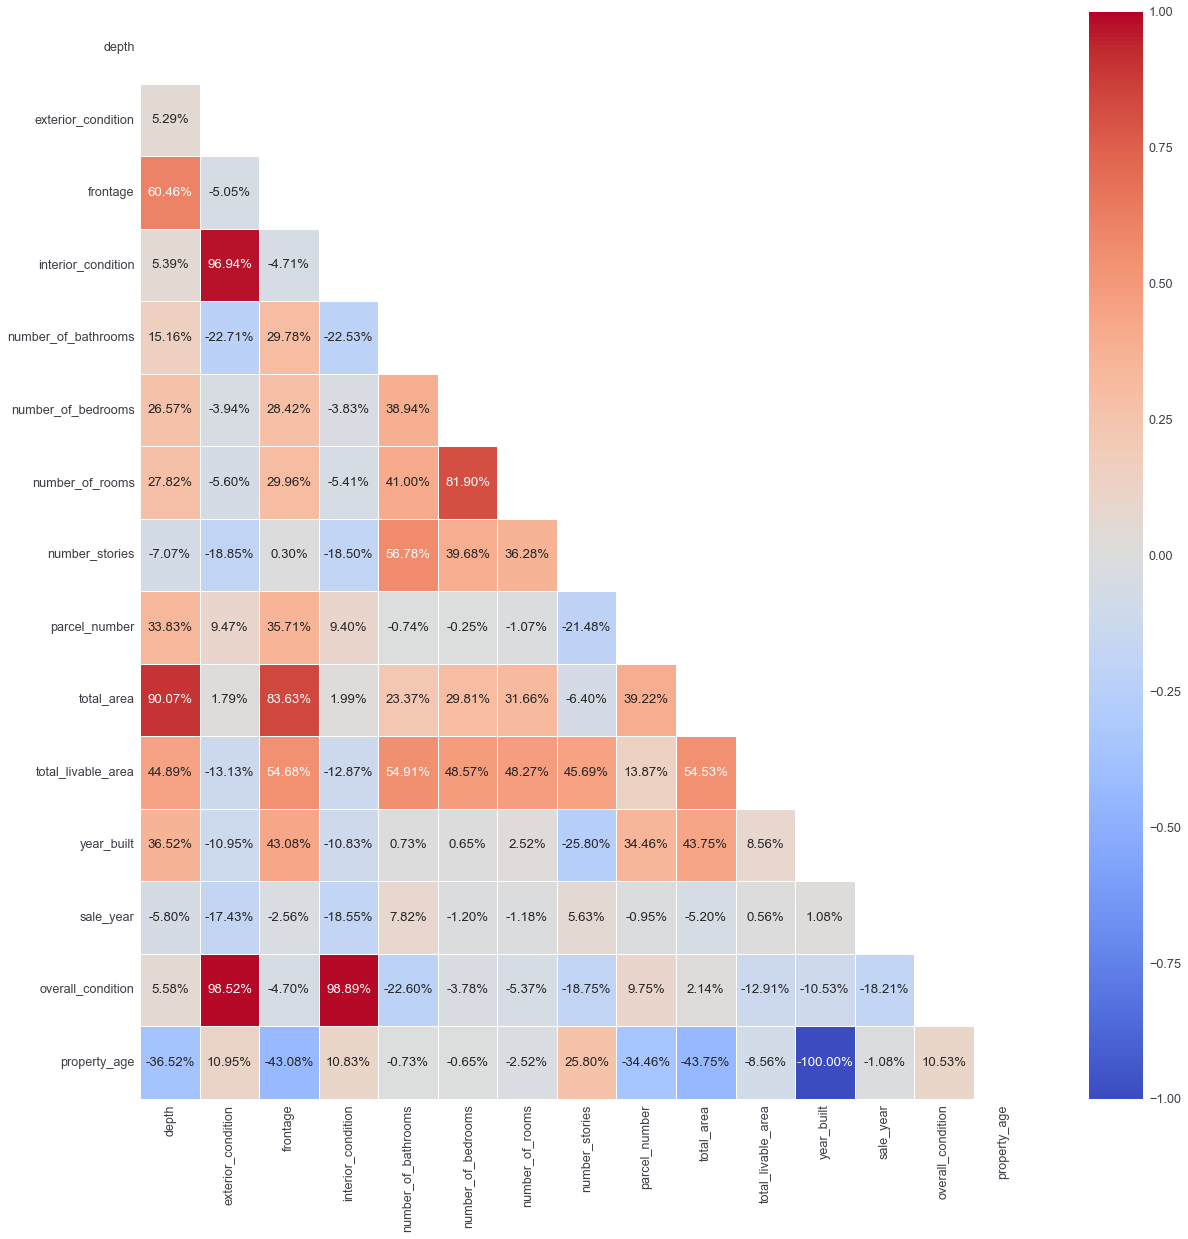

In [13]:
# Heatmap of correlation between numerical features
plt.figure(figsize=(20,20))
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt='.2%', linewidth=1, mask=mask)
plt.savefig('Heatmap.png')
plt.show()

There is another reason why we choose selected features. Based on correlation heatmap above, we try to avoid high multicollinearity between numerical features, so we just pick one selected feature if there are some feature with high correlation between the others.

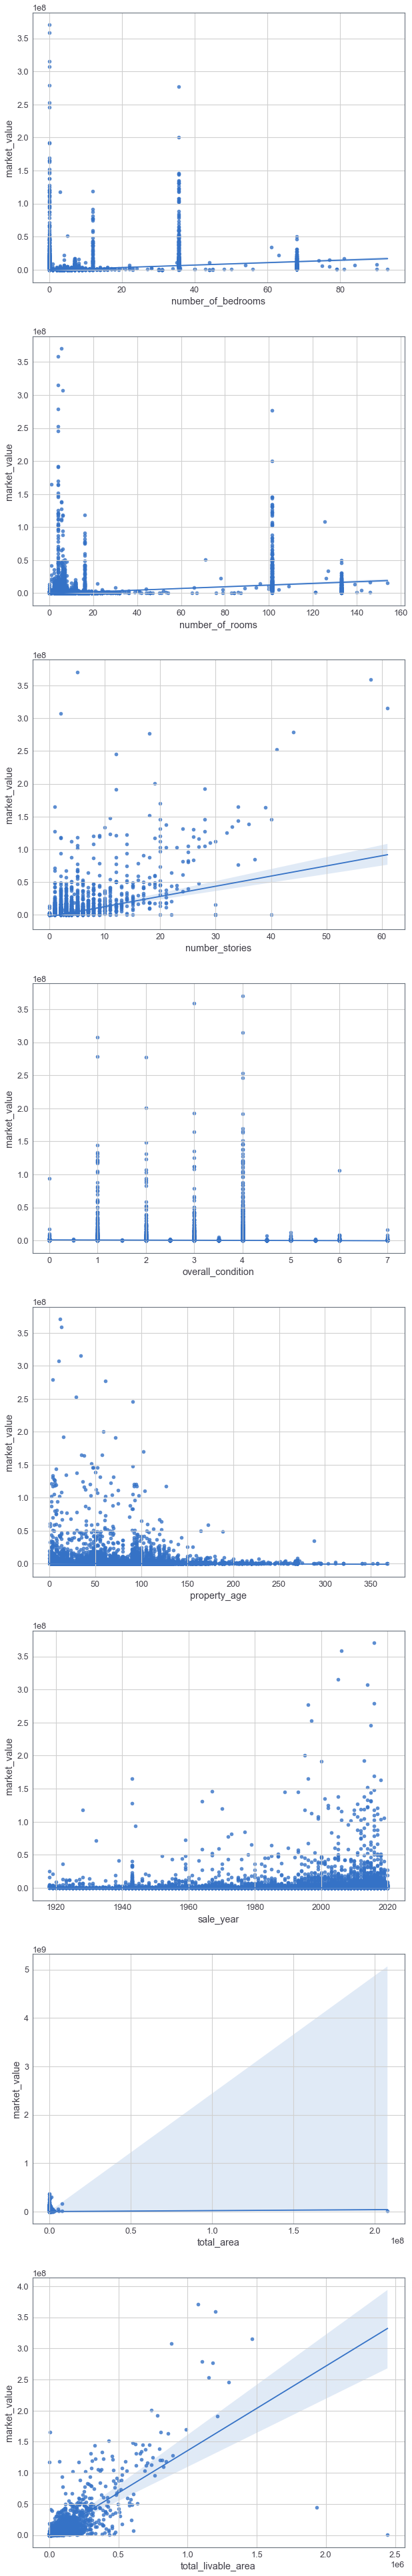

In [14]:
fig, ax = plt.subplots(8,1, figsize=(10,70))
for variable, subplot in zip(['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','property_age',
                              'sale_year','total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

From regplot above, there are some distinct contextual outliers that we can track especially from total_area and total_livable area. We try to drop those values so we can get better regplot result.

#### Contextual Outlier Analysis

From regplot above we try to define cutoff for outliers, here's our results:
1. Values above 20.000.000 in total_area are considered to be outliers.
2. Values above 1.250.000 in total_livable_area are considered to be outliers.

In [15]:
df[(df['total_area']>20000000) | (df['total_livable_area']>1250000)]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
30907,APT 2-4 UNITS 3 STY MASON,Multi Family,Y,66.00,4.0,0,24.33,4.0,701 SOUTH ST,751000.0,2.0,4.0,10.0,3.0,N,53088615,E,2011-07-29,429000.0,ST,F,1.605780e+03,2445358.0,F,I,1975.0,19147,RM1,Residential Multi Family,2011.0,2015-2011,2,4.0,45.0
460147,SCHOOL 3 STY MASONRY,Commercial,0,200.00,4.0,0,531.54,4.0,4420 HAVERFORD AVE,44857200.0,4.5,0.0,6.0,3.0,N,783206951,A,1958-03-03,1.0,AVE,F,4.838960e+05,1935584.0,F,I,1965.0,19104,RSA2,Residential Single Family,1958.0,1960-1956,0,4.0,55.0
461112,SCHOOL 2 STY MASONRY,Commercial,0,43560.00,5.0,0,4768.00,5.0,2400 N 57TH ST,8392700.0,1.0,0.0,7.0,2.0,N,783766600,E,1948-09-15,1.0,ST,F,2.076941e+08,111198.0,F,I,1950.0,19131,SPINS,Special Purpose Institution,1948.0,1950-1946,0,5.0,70.0
468123,IND WAREHOUSE MASONRY,Industrial,0,528.00,4.0,0,224.54,4.0,401 N BROAD ST,245769000.0,1.0,0.0,4.0,12.0,N,874900000,A,2015-10-06,10.0,ST,F,1.179310e+05,1296804.0,F,I,1929.0,19108,I2,Industrial,2015.0,2015-2011,1,4.0,91.0
489496,OFF BLD COM NO GAR MASON,Commercial,0,167.54,4.0,0,196.58,4.0,1650 MARKET ST,315046100.0,1.0,0.0,4.0,61.0,N,883031676,A,2005-08-31,10.0,ST,F,3.287600e+04,1464000.0,F,I,1986.0,19103,CMX5,Mixed Used,2005.0,2005-2001,0,4.0,34.0


In [16]:
index_out=df[(df['total_area']>20000000) | (df['total_livable_area']>1250000)].index

In [17]:
df.drop(index=index_out, axis=0, inplace=True)

In [18]:
df.reset_index(drop=True)

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
0,ROW W/GAR 3 STY MASONRY,Single Family,N,49.0,5.0,0,15.90,5.0,108 WHARTON ST,186800.0,2.0,4.0,7.0,3.0,N,11000600,E,1951-01-31,1.0,ST,F,779.0,1650.0,F,I,1920.0,19147,RSA5,Residential Single Family,1951.0,1955-1951,1,5.0,100.0
1,ROW 3 STY MASONRY,Single Family,Y,49.0,2.0,0,15.90,2.0,110 WHARTON ST,341600.0,1.0,3.0,4.0,3.0,N,11000700,E,2017-04-14,395000.0,ST,F,779.1,1203.0,F,I,1920.0,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,2.0,100.0
2,ROW 3 STY MASONRY,Single Family,N,49.0,4.0,0,14.80,4.0,112 WHARTON ST,226200.0,1.0,4.0,5.0,2.0,N,11000800,E,1975-09-04,1.0,ST,F,725.2,1482.0,F,I,1920.0,19147,RSA5,Residential Single Family,1975.0,1975-1971,0,4.0,100.0
3,ROW 3 STY MASONRY,Single Family,Y,100.0,4.0,0,14.33,4.0,114 WHARTON ST,241500.0,2.0,4.0,8.0,2.0,N,11000900,E,2012-02-16,1.0,ST,F,1433.0,2049.0,F,I,1920.0,19147,RSA5,Residential Single Family,2012.0,2015-2011,0,4.0,100.0
4,ROW 3 STY MASONRY,Single Family,N,100.0,4.0,0,15.00,4.0,116 WHARTON ST,237000.0,2.0,4.0,6.0,3.0,N,11001000,E,2017-07-21,1.0,ST,F,1500.0,1155.0,F,I,1920.0,19147,RSA5,Residential Single Family,2017.0,2020-2016,0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495380,RES CONDO 3 STY MAS+OTH,Single Family,Y,62.0,1.0,0,16.80,1.0,1401 N 2ND ST,344900.0,3.0,3.0,6.0,3.0,N,888181016,E,2015-05-15,365000.0,ST,F,1041.6,1854.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495381,RES CONDO 3 STY MAS+OTH,Single Family,Y,62.0,1.0,0,16.80,1.0,1401 N 2ND ST,349500.0,2.0,3.0,5.0,3.0,N,888181018,E,2015-05-20,369000.0,ST,F,1041.6,1571.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495382,RES CONDO 3 STY MAS+OTH,Single Family,Y,45.0,1.0,0,18.00,1.0,1306 HOPE ST,240000.0,1.0,2.0,4.0,3.0,N,888181020,E,2015-09-04,255000.0,ST,F,810.0,1041.0,F,I,2015.0,19122,RSA5,Residential Single Family,2015.0,2015-2011,1,1.0,5.0
495383,RES CONDO 3 STY MAS+OTH,Single Family,Y,45.0,1.0,0,18.00,1.0,1306 HOPE ST,288200.0,1.0,2.0,4.0,3.0,N,888181022,E,2018-12-14,324500.0,ST,F,810.0,1134.0,F,I,2015.0,19122,RSA5,Residential Single Family,2018.0,2020-2016,1,1.0,5.0


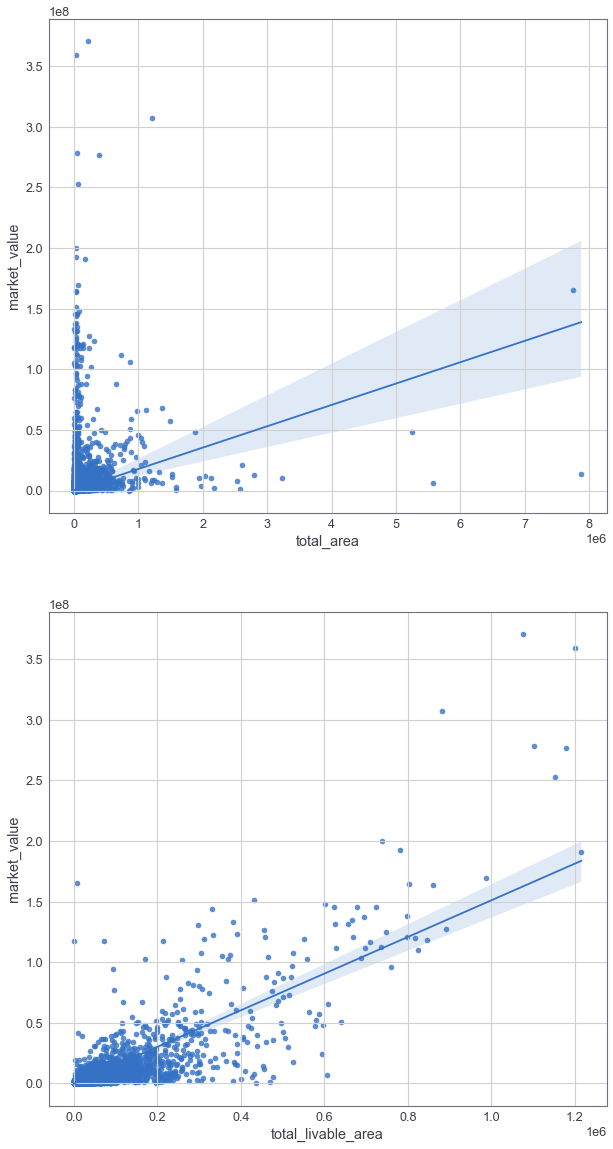

In [19]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
for variable, subplot in zip(['total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

After dropping some outliers, as we see above, there are still outliers in total_area column so we must drop those outliers. From our analysis total_area values above still 2.500.000 considered to be an outliers.

In [20]:
df[df['total_area']>2500000]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
460252,MISC FIRE/POLICE MASONRY,Commercial,0,77418.83,4.0,0,100.00,4.0,11650 ACADEMY RD,165198800.0,1.0,0.0,1.0,1.0,N,786002600,E,1943-01-01,4.0,RD,F,7741883.00,6290.0,F,I,1963.0,19154,RSA4,Residential Single Family,1943.0,1945-1941,0,4.0,57.0
460356,SCHOOL 3 STY MASONRY,Commercial,0,580.50,4.0,0,4485.00,4.0,6000 STENTON AVE,21258300.0,4.5,0.0,6.0,3.0,N,784421900,E,1972-01-19,1.0,AVE,F,2603542.50,180066.0,F,I,1972.0,19138,RSA3,Residential Single Family,1972.0,1975-1971,0,4.0,48.0
461430,IND WAREHOUSE MASONRY,Industrial,0,1988.35,4.0,0,1099.52,4.0,51 MUSTIN ST,13376000.0,1.0,0.0,4.0,1.0,N,788015250,E,2011-08-16,1.0,ST,F,7876084.00,100000.0,F,I,1950.0,19112,I3,Industrial,2011.0,2015-2011,1,4.0,70.0
461981,CEMETERY,Commercial,0,2076.80,4.0,0,1285.68,4.0,1201 EASTON RD,13085300.0,0.0,0.0,0.0,0.0,N,775051015,B,2008-09-26,300000.0,RD,F,2802943.62,19059.0,F,0,1867.0,19150,RSA3,Residential Single Family,2008.0,2010-2006,0,4.0,153.0
467973,APTS 100+ UNITS MASONRY,Multi Family,0,120.00,4.0,0,1.00,4.0,8724 CRISPIN ST,48627400.0,66.0,35.5,101.5,2.0,N,881192000,B,1952-08-01,1.0,ST,F,5248824.00,597188.0,F,I,1952.0,19136,RM2,Residential Multi Family,1952.0,1955-1951,1,4.0,68.0
469131,OFF BLD N/PKG N/COM MASON,Commercial,0,9474.06,4.0,0,2.37,4.0,4401 S BROAD ST,5948600.0,1.0,0.0,5.5,1.0,N,875100900,B,2008-03-13,1.0,ST,F,5570888.40,2220.0,F,I,2005.0,19112,I3,Industrial,2008.0,2010-2006,0,4.0,15.0
486911,CEMETERY,Commercial,0,3160.00,4.0,0,1020.00,4.0,1801 CEMETERY AVE,9980400.0,0.0,0.0,0.0,0.0,N,885491060,E,1952-01-17,1.0,AVE,F,3223200.00,6756.0,F,I,1925.0,19142,RSA2,Residential Single Family,1952.0,1955-1951,0,4.0,95.0
488101,IND WAREHOUSE MASONRY,Industrial,0,2710.64,7.0,0,24.00,7.0,7777R STATE RD,7839900.0,1.0,0.0,4.0,2.0,N,884257540,A,2014-01-23,100.0,RD,F,2531811.00,23000.0,F,0,1920.0,19136,I3,Industrial,2014.0,2015-2011,0,7.0,100.0
489689,IND WAREHOUSE MASONRY,Industrial,0,257827.84,4.0,0,100000.00,4.0,6030 W PASSYUNK AVE,1451100.0,1.0,0.0,4.0,1.0,N,884097140,A,2012-09-07,35825280.0,AVE,F,2578272.84,7375.0,F,I,1960.0,19153,I3,Industrial,2012.0,2015-2011,1,4.0,60.0


In [21]:
index_out2=df[df['total_area']>2500000].index

In [22]:
df.drop(index=index_out2, axis=0, inplace=True)

In [23]:
df.reset_index(drop=True, inplace=True)

#### Further Contextual Outlier Analysis

In [24]:
# Function to calculate extreme outliers
def extreme_outliers(data):
    q1=data.quantile(.25)
    q3=data.quantile(.75)
    iqr=q3-q1
    lower_thsd = q1-(3*iqr)
    upper_thsd = q3+(3*iqr)
    print(q1)
    print(q3)
    print(iqr)
    print(f'{lower_thsd} is the lower threshold value for extreme outliers in data')
    print(f'{upper_thsd} is the upper threshold value for extreme outliers in data')
    A=[]
    for i in range(len(data)):
        if (data.loc[i] < lower_thsd) | (data.loc[i] > upper_thsd):
            A.append(data.loc[i])
        else:
            continue
    if len(A) != 0:
        print(f'There are {len(A)} outliers in data')
    else:
        print('There is no outliers in data')
    print('In percentage, there are ', round((len(A)/len(data))*100,2),'% outliers in this data')

##### Market value based on continuous numerical contextual outlier

After we remove contextual outliers in continuous numerical feature, now we try to analyze contextual outliers in market value with bivariate analysis.

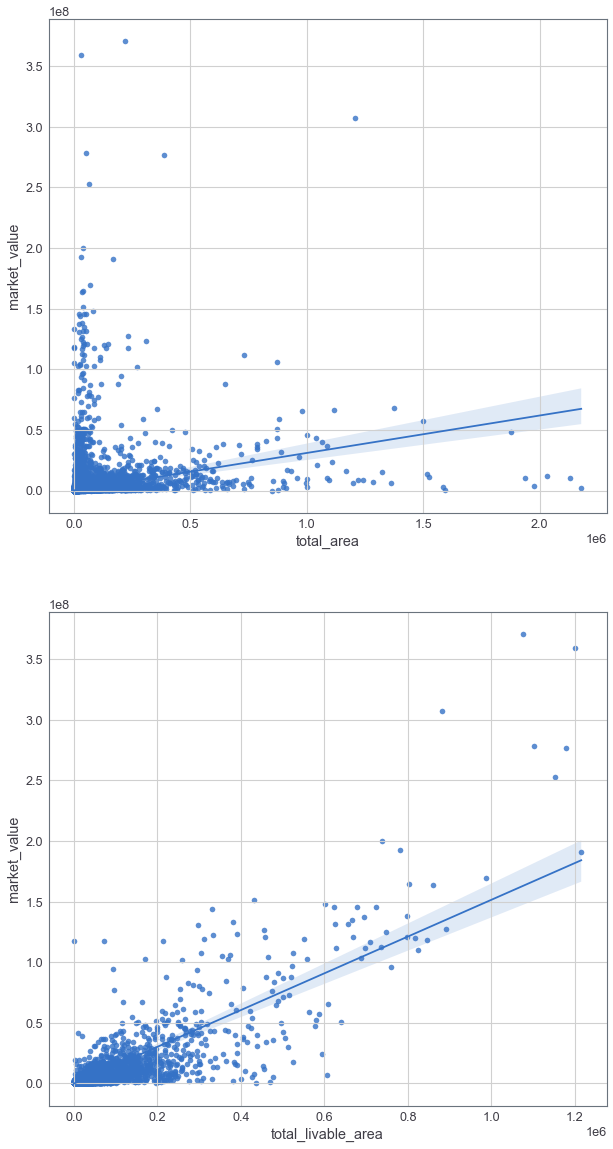

In [25]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
for variable, subplot in zip(['total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

From regplot above, we analyze there are some outliers in market_value. Those outliers value are above 150.000.000 while majority of the data occur below 500.000, so we can considered this value as very extreme outliers. Occurence of the values above 150.000.000 explain why the data has a right skew.

In [26]:
df[df['market_value']>150000000]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
469466,APTS 100+ UNITS MASONRY,Multi Family,0,427.00,2.0,0,391.25,2.0,2201 PARK TOWNE PL,276892000.0,66.0,35.5,101.5,18.0,N,881030930,A,1996-09-30,2000000.0,PL,F,387684.00,1179072.0,F,I,1959.0,19130,RM4,Residential Multi Family,1996.0,2000-1996,0,2.0,61.0
469923,APTS 100+ UNITS MASONRY,Multi Family,0,396.00,2.0,0,98.00,2.0,1801 JOHN F KENNEDY BLVD,200287300.0,66.0,35.5,101.5,19.0,N,881035000,E,1995-11-30,1.0,BLV,F,38808.00,738207.0,F,I,1961.0,19103,CMX5,Mixed Used,1995.0,1995-1991,0,2.0,59.0
482011,AMUSE HALL MASONRY,Commercial,0,998.88,1.0,0,1500.59,1.0,1001-99 N DELAWARE AVE,307363100.0,1.0,0.0,6.0,2.0,N,882028210,B,2014-10-10,1.0,AVE,C,1206908.00,880949.0,F,I,2010.0,19125,SPENT,Special Purpose Entertainment,2014.0,2015-2011,1,1.0,10.0
489483,OFF BLD COM NO GAR MASON,Commercial,0,198.00,4.0,0,177.25,4.0,1600-22 MARKET ST,163646300.0,1.0,0.0,4.0,39.0,N,883031500,E,2018-02-07,160000000.0,ST,A,35095.50,859989.0,F,I,1982.0,19103,CMX5,Mixed Used,2018.0,2020-2016,0,4.0,38.0
490466,OFF BLD COM NO GAR MASON,Commercial,0,284.00,4.0,0,226.87,4.0,2001 MARKET ST,252703800.0,1.0,0.0,4.0,41.0,N,883054361,E,1997-01-30,1.0,ST,F,64431.00,1152480.0,F,I,1991.0,19103,CMX5,Mixed Used,1997.0,2000-1996,0,4.0,29.0
490651,OFF BLD N/COM W/PKG MASON,Commercial,0,1.00,3.0,0,30179.00,3.0,1701 JOHN F KENNEDY BLVD,358973100.0,4.0,0.0,4.0,58.0,N,883056605,E,2006-02-23,1.0,BLV,F,30179.00,1200021.0,F,I,2007.0,19103,CMX5,Mixed Used,2006.0,2010-2006,0,3.0,13.0
490652,OFF BLD COM NO GAR MASON,Commercial,0,157.00,1.0,0,396.00,1.0,1800 ARCH ST,278766900.0,1.0,0.0,4.0,44.0,N,883056805,A,2016-12-28,1.0,ST,F,51574.00,1103287.0,F,I,2016.0,19103,CMX5,Mixed Used,2016.0,2020-2016,1,1.0,4.0
490800,OFF BLD COM NO GAR MASON,Commercial,0,220.00,4.0,0,324.00,4.0,508-32 WALNUT ST,169697900.0,1.0,0.0,4.0,20.0,N,883006500,A,2016-06-22,114170000.0,ST,A,69998.00,986960.0,F,I,1918.0,19106,CMX4,Mixed Used,2016.0,2020-2016,0,4.0,102.0
490972,OFF BLD COM NO GAR MASON,Commercial,0,288.00,3.0,0,132.00,3.0,100-20 N 18TH ST,164954700.0,1.0,0.0,4.0,34.0,N,883061805,E,1996-06-18,1.0,ST,F,38016.00,803012.0,F,I,1985.0,19103,CMX5,Mixed Used,1996.0,2000-1996,0,3.0,35.0
490974,OFF BLD COM NO GAR MASON,Commercial,0,225.91,3.0,0,192.79,3.0,2929 ARCH ST,192376800.0,1.0,0.0,4.0,28.0,N,883062400,A,2013-10-17,23200000.0,ST,F,29633.00,782208.0,F,I,2005.0,19104,CMX5,Mixed Used,2013.0,2015-2011,1,3.0,15.0


In [27]:
index_out3=df[df['market_value']>150000000].index

In [28]:
df.drop(index=index_out3, axis=0, inplace=True)

In [29]:
df.reset_index(drop=True, inplace=True)

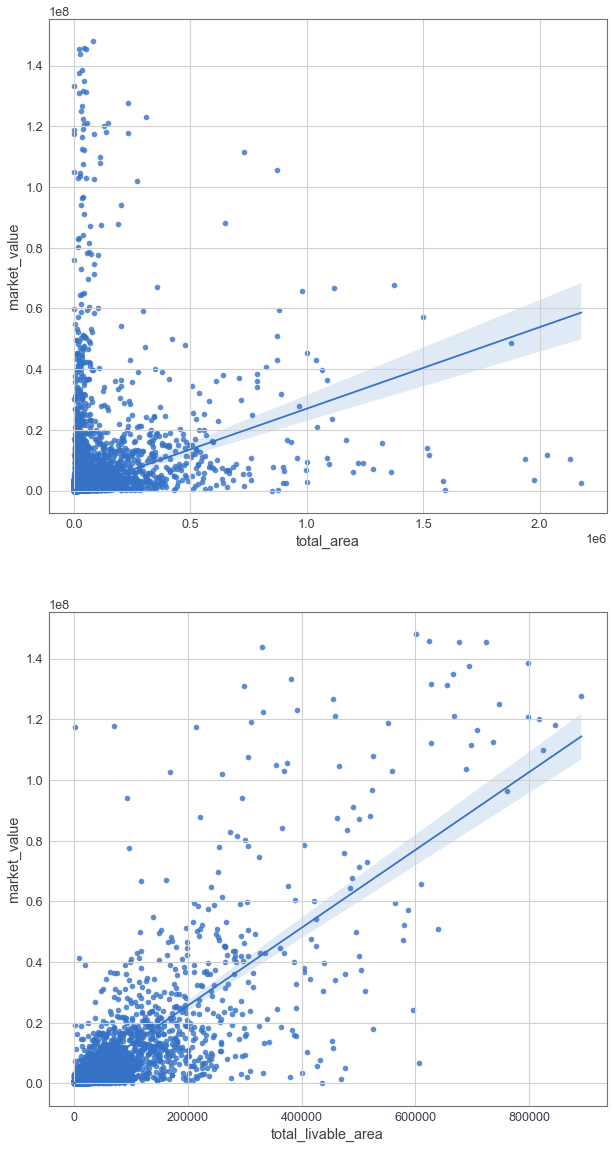

In [30]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
for variable, subplot in zip(['total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

After we drop the extreme outliers we can see clearly the distribution of the data, even tough there are many data which located outside majority of the data, we considered this as the natural behaviour of the data since this is a complex real world.

##### Total Area

After long discussion and consideration, we must revisit and find another hidden outlier that can be still exist in numerical data. In this part we try to combine numerical feature with categorical group, so we can track if there any hidden outliers.

In [31]:
# Check descriptive statistics of total area based on category code description
df.groupby('category_code_description')['total_area'].describe()

,count,mean,std,min,25%,50%,75%,max
category_code_description,,,,,,,,
Commercial,9148.0,24239.861761,94262.846501,1.0,2077.875,4950.00,14164.00,2178000.0
Industrial,2713.0,36655.440940,96451.625202,120.0,2688.160,7017.00,26064.30,1515510.0
Mixed Use,14257.0,1734.899198,2677.605685,192.0,1062.000,1337.50,1838.00,262183.9
Multi Family,42058.0,4623.117122,24658.050965,1.0,1345.410,1983.32,2992.00,1242766.8
Single Family,427156.0,2075.508695,5074.752963,1.0,931.000,1291.50,1972.30,1591700.0
Vacant Land,31.0,46756.094194,172364.396874,700.0,1265.135,1392.00,2968.75,911710.8


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


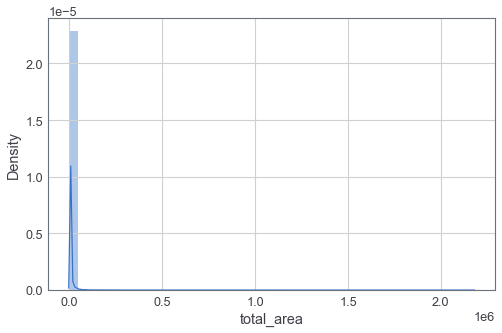

In [32]:
#plot total_area data distribution
plt.figure(figsize=(8,5))
sns.distplot(df['total_area'], kde=True)
plt.show()

From histogram total_area above, we can see the distribution of the data is not normal and also we cannot see the true distribution of the data. To fix this problem we can drop data above 100.000 feet (Extreme Q3 value), so we can get better data distribution. 

In [33]:
# Extreme Q3 Value
df[df['total_area']>100000]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
37818,ROW 2 STY MASONRY,Single Family,0,62.00,5.0,0,13750.00,5.0,230 E INDIANA AVE,16600.0,1.0,3.0,6.0,2.0,N,71237500,E,2018-02-14,7000.0,AVE,F,852500.00,1080.0,F,I,1920.0,19134,RM1,Residential Multi Family,2018.0,2020-2016,0,5.0,100.0
46881,DET W/B GAR 2.5 STY STONE,Single Family,Y,440.37,3.0,1,228.59,3.0,8863 NORWOOD AVE,1464100.0,4.0,5.0,13.0,3.0,N,91221004,B,2009-12-17,1.0,AVE,B,110148.00,6270.0,F,C,1892.0,19118,RSD1,Residential Single Family,2009.0,2010-2006,3,3.0,128.0
46882,DET W/D GAR 2.5 STY STONE,Single Family,Y,325.00,4.0,1,53.50,4.0,8871 NORWOOD AVE,1033200.0,4.0,7.0,13.0,3.0,N,91221010,B,1995-08-25,350000.0,AVE,B,114125.00,5800.0,F,C,1896.0,19118,RSD1,Residential Single Family,1995.0,1995-1991,2,4.0,124.0
46920,DET W/B GAR 2 STY STONE,Single Family,N,188.35,4.0,>3,339.33,4.0,204 LYNNEBROOK LN,1017100.0,2.0,4.0,8.0,2.0,N,91136405,B,1983-12-22,1.0,LA,A,121968.00,6276.0,F,C,1925.0,19118,RSD1,Residential Single Family,1983.0,1985-1981,2,4.0,95.0
47028,DET W/D GAR 2 STY STONE,Single Family,N,462.26,4.0,>3,222.75,4.0,63 E BELLS MILL RD,964700.0,2.0,4.0,7.0,2.0,N,91141100,E,2015-06-05,750000.0,RD,F,102968.41,5594.0,F,C,1925.0,19118,RSD1,Residential Single Family,2015.0,2015-2011,2,4.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494322,APTS 51-100 UNITS MASONRY,Multi Family,0,342.22,3.0,0,462.35,3.0,507 MANHEIM ST,2336400.0,65.0,68.0,133.0,2.0,N,886603400,E,1998-11-16,450000.0,ST,F,158224.96,79488.0,F,I,1935.0,19144,RM2,Residential Multi Family,1998.0,2000-1996,1,3.0,85.0
494329,APTS 5-50 UNITS MASONRY,Multi Family,Y,498.00,2.0,0,396.00,2.0,1001-37 W GIRARD AVE,1888000.0,5.0,7.0,12.0,3.0,N,886667000,E,1966-03-21,1.0,AVE,F,197208.00,21900.0,F,I,1965.0,19123,RM2,Residential Multi Family,1966.0,1970-1966,1,2.0,55.0
494339,APTS 100+ UNITS MASONRY,Multi Family,0,396.00,6.0,0,1532.00,6.0,3232 HENRY AVE,2280000.0,66.0,35.5,101.5,1.0,N,886670500,E,2015-01-02,2100000.0,AVE,F,352109.00,304410.0,F,I,1950.0,19129,RSA5,Residential Single Family,2015.0,2015-2011,1,6.0,70.0
494493,APT BOARDING HOME MASONRY,Multi Family,0,443.03,2.0,0,365.00,2.0,118-60 E INDIANA AVE,1654600.0,2.0,28.0,30.0,2.0,N,886605650,B,1981-12-21,114200.0,AVE,F,123536.16,191781.0,F,0,1935.0,19134,IRMX,Mixed Used,1981.0,1985-1981,0,2.0,85.0


In [34]:
index_out4=df[df['total_area']>100000].index

In [35]:
len(df[df['total_area']>100000])/len((df['market_value']))*100
#Drop 0.016% from the data to remove extreme outliers for better data modelling quality

0.19642161404868752

In [36]:
df.drop(index=index_out4, axis=0, inplace=True)

In [37]:
df.reset_index(drop=True, inplace=True)

(array([2.8000e+01, 2.7100e+02, 2.4000e+02, 5.7100e+02, 1.8040e+03,
        6.7330e+03, 2.7446e+04, 3.3293e+04, 2.6757e+04, 4.0474e+04]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000]),
 <BarContainer object of 10 artists>)

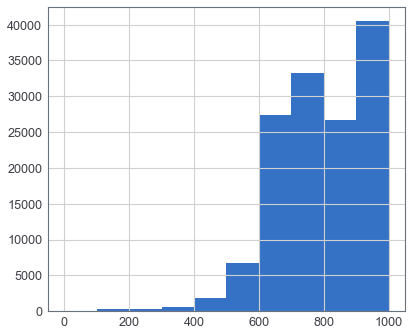

In [38]:
# Extreme Q1 value
# After we track outlier above Q3, now we try to track outlier below Q1
plt.hist(df['total_area'],bins=[0,100,200,300,400,500,600,700,800,900,1000])

There are extreme changing value of the total area from 600 to 500, so we can consider this as extreme Q1 outlier and we can drop this data for better data modelling quality.

In [39]:
df[df['total_area']<600]

,building_code_description,category_code_description,central_air,depth,exterior_condition,fireplaces,frontage,interior_condition,location,market_value,number_of_bathrooms,number_of_bedrooms,number_of_rooms,number_stories,other_building,parcel_number,parcel_shape,sale_date,sale_price,street_designation,topography,total_area,total_livable_area,unfinished,view_type,year_built,zip_code,zoning,new_zoning,sale_year,sale_year_group,parking_spaces,overall_condition,property_age
11,ROW 2 STY MASONRY,Single Family,N,32.00,4.0,0,13.33,4.0,108 SEARS ST,155400.0,1.0,2.0,4.0,2.0,N,11003500,E,2015-09-22,90000.0,ST,F,426.56,572.0,F,I,1920.0,19147,RSA5,Residential Single Family,2015.0,2015-2011,0,4.0,100.0
26,ROW 2 STY MASONRY,Single Family,N,32.00,5.0,0,13.50,5.0,110 SEARS ST,124500.0,1.0,2.0,4.0,2.0,N,11003600,E,1991-12-17,1.0,ST,F,432.00,828.0,F,I,1920.0,19147,RSA5,Residential Single Family,1991.0,1995-1991,0,5.0,100.0
27,ROW 2 STY MASONRY,Single Family,N,32.00,4.0,0,14.00,4.0,112 SEARS ST,184700.0,1.0,2.0,4.0,2.0,N,11003700,E,1997-04-09,45000.0,ST,F,448.00,870.0,F,I,1920.0,19147,RSA5,Residential Single Family,1997.0,2000-1996,0,4.0,100.0
34,ROW 2 STY MASONRY,Single Family,Y,44.80,2.0,0,9.60,2.0,215 EARP ST,254900.0,1.0,2.0,4.0,2.0,N,11005100,E,2012-05-04,164000.0,ST,F,430.08,768.0,F,I,1920.0,19147,RSA5,Residential Single Family,2012.0,2015-2011,0,2.0,100.0
35,ROW 2 STY MASONRY,Single Family,N,49.62,4.0,0,12.00,4.0,217 EARP ST,180400.0,1.0,2.0,4.0,2.0,N,11005200,E,2016-03-25,410000.0,ST,F,595.44,936.0,F,I,1920.0,19147,RSA5,Residential Single Family,2016.0,2020-2016,0,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494296,CONDO PARKING SPACE,Single Family,0,162.00,4.0,0,1.00,4.0,4236 OSAGE AVE,17000.0,0.0,0.0,0.0,0.0,N,888270038,E,2006-05-06,27500.0,AVE,F,162.00,0.0,F,0,2006.0,19104,RM1,Residential Multi Family,2006.0,2010-2006,1,4.0,14.0
494297,CONDO PARKING SPACE,Single Family,0,162.00,4.0,0,1.00,4.0,4236 OSAGE AVE,17000.0,0.0,0.0,0.0,0.0,N,888270040,E,2005-10-31,335000.0,AVE,F,162.00,0.0,F,0,2006.0,19104,RM1,Residential Multi Family,2005.0,2005-2001,1,4.0,14.0
494298,CONDO PARKING SPACE,Single Family,0,162.00,4.0,0,1.00,4.0,4236 OSAGE AVE,17000.0,0.0,0.0,0.0,0.0,N,888270042,E,2005-10-13,410000.0,AVE,F,162.00,0.0,F,0,2006.0,19104,RM1,Residential Multi Family,2005.0,2005-2001,1,4.0,14.0
494299,CONDO PARKING SPACE,Single Family,0,162.00,4.0,0,1.00,4.0,4236 OSAGE AVE,17000.0,0.0,0.0,0.0,0.0,N,888270044,E,2018-06-27,460000.0,AVE,F,162.00,0.0,F,0,2006.0,19104,RM1,Residential Multi Family,2018.0,2020-2016,1,4.0,14.0


In [40]:
index_out5=df[df['total_area']<600].index

In [41]:
df.drop(index=index_out5, axis=0, inplace=True)

In [42]:
df.reset_index(drop=True, inplace=True)

Now we try to check data distribution of total_area after dropping extreme outlier Q1 and Q3 (transformed into log dist).

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.21 and sigma = 0.31



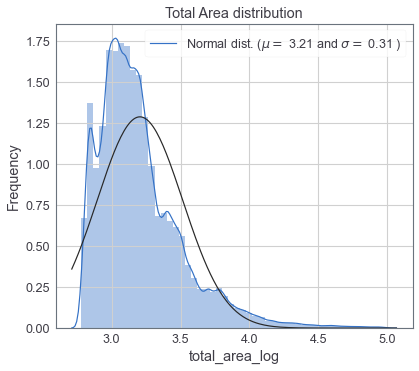

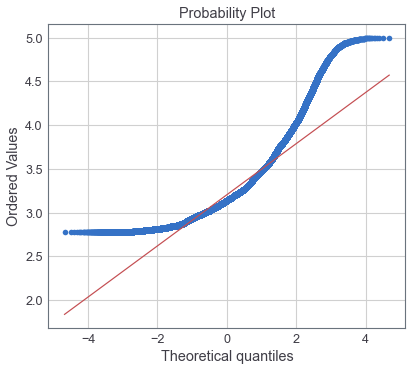

In [43]:
df["total_area_log"] = np.log10(df["total_area"])

#Check the new distribution 
sns.distplot(df['total_area_log'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['total_area_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Total Area distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['total_area_log'], plot=plt)
plt.show()

After drop extreme Q1 and Q3 outliers, now total area has a better data distribution.

##### Total Liveable Area

Check hidden outlier in numerical feature by grouping it with categorical feature.

In [44]:
df.groupby('category_code_description')['total_livable_area'].describe()

,count,mean,std,min,25%,50%,75%,max
category_code_description,,,,,,,,
Commercial,8671.0,10972.339523,38050.657634,0.0,1914.5,3700.0,8491.0,798189.0
Industrial,2452.0,12055.780179,24329.722130,0.0,2160.0,4809.0,12630.0,526000.0
Mixed Use,14145.0,2588.610180,1370.109158,418.0,1740.0,2244.0,2985.0,20070.0
Multi Family,41731.0,4160.550454,16645.449733,478.0,1610.0,1968.0,2660.0,677140.0
Single Family,417716.0,1365.313552,540.400045,85.0,1080.0,1230.0,1486.0,40628.0
Vacant Land,28.0,496.178571,944.389909,0.0,0.0,0.0,609.5,3346.0


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


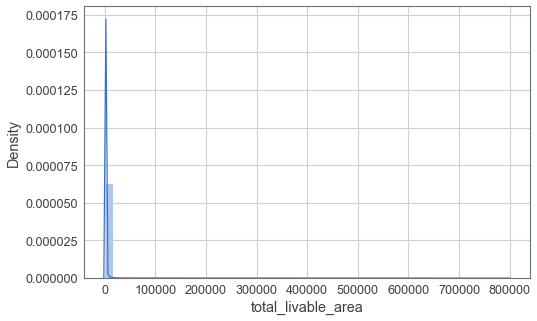

In [45]:
#plot total_livable_area data distribution
plt.figure(figsize=(8,5))
sns.distplot(df['total_livable_area'], kde=True)
plt.show()

In [46]:
#Checking total_liveable_area above 750.000 since its value far from 75% (Q3) of the data and can be considered as extreme outlier
df[df['total_livable_area']>750000][['frontage','depth','total_area','total_livable_area','number_stories','building_code_description']]

,frontage,depth,total_area,total_livable_area,number_stories,building_code_description
481437,230.0,155.69,35808.0,760200.0,25.0,OFF BLD COM NO GAR MASON
481569,251.0,1348.00,33952.0,797220.0,36.0,OFF BLD N/PKG N/COM MASON
481570,396.0,108.00,42768.0,798189.0,20.0,OFF BLD COM NO GAR MASON


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 1867.52 and sigma = 7465.98



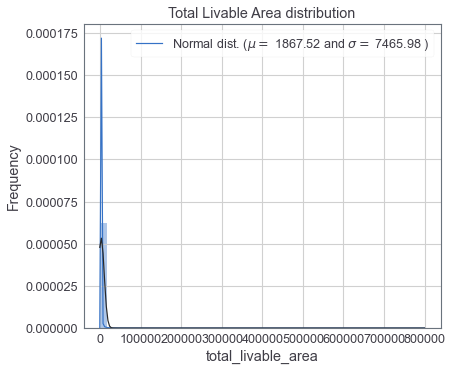

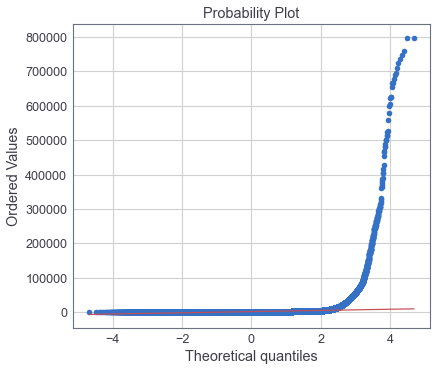

In [47]:
#Check the new distribution 
sns.distplot(df['total_livable_area'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['total_livable_area'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Total Livable Area distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['total_livable_area'], plot=plt)
plt.show()

In [48]:
df["total_livable_area_log"] = np.log10(df["total_livable_area"])

C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [49]:
df['total_livable_area_log'].describe()

count    4.847430e+05
mean             -inf
std               NaN
min              -inf
25%      3.044148e+00
50%      3.110590e+00
75%      3.217221e+00
max      5.902106e+00
Name: total_livable_area_log, dtype: float64

In [50]:
index=df[df['total_livable_area_log']==np.NINF].index
df.loc[index,'total_livable_area_log']=0

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 3.15 and sigma = 0.21



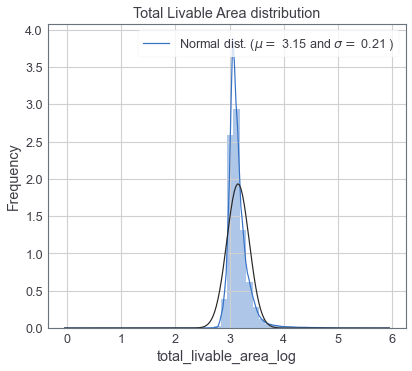

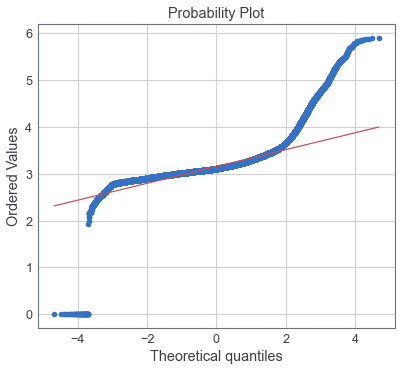

In [51]:
#Check the new distribution 
sns.distplot(df['total_livable_area_log'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['total_livable_area_log'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Total Livable Area distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['total_livable_area_log'], plot=plt)
plt.show()

In [52]:
df.reset_index(drop=True, inplace=True)

From histogram total_livable_area above, we can see the distribution of the data is normal altough we don't drop any data. So we already clear to clean data from numerical outliers.

Numerical features after feature selection based on EDA and outlier analysis:
1. number_of_rooms
2. number_stories
3. overall_condition
4. property_age
5. sale_year
6. total_area
7. total_livable_area

## Final Feature

After feature selection process this is the final data that we use for modelling process.

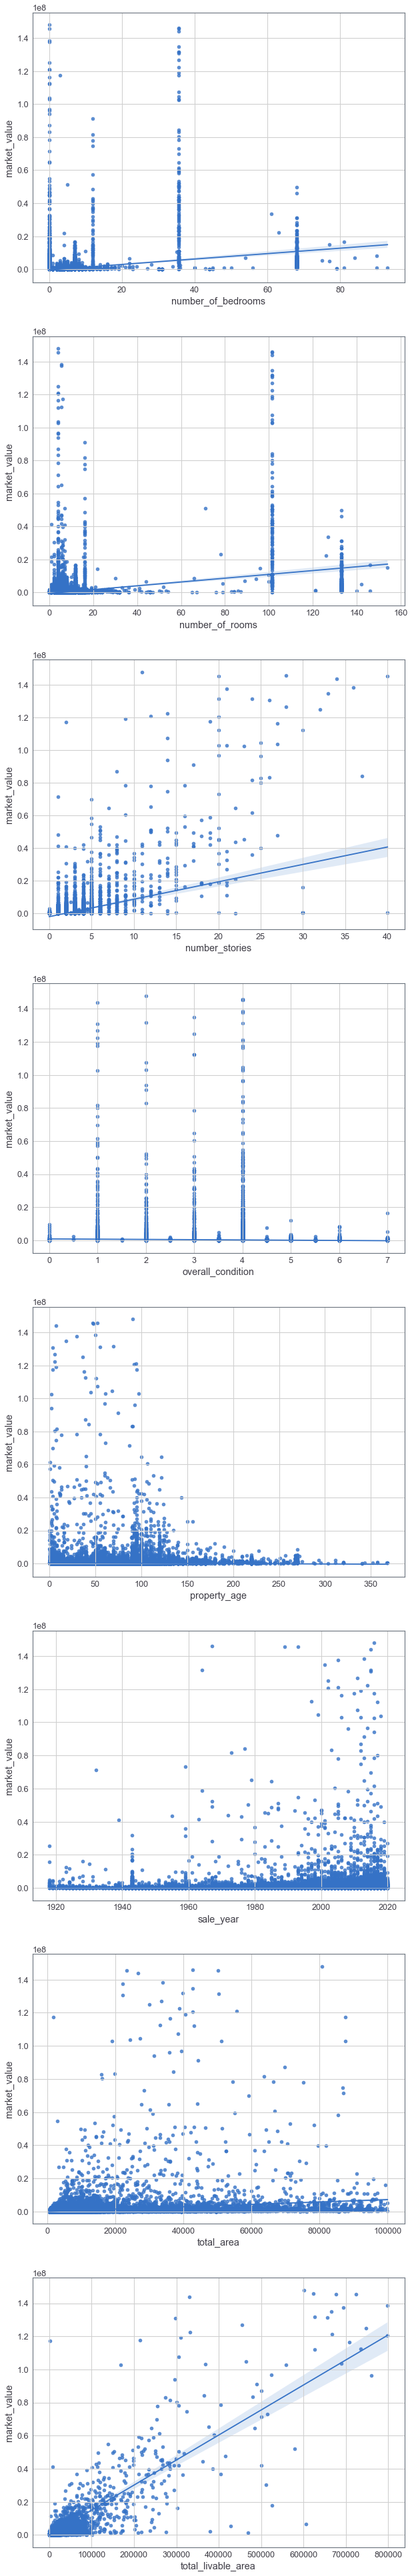

In [53]:
fig, ax = plt.subplots(8,1, figsize=(10,70))
for variable, subplot in zip(['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','property_age',
                              'sale_year','total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=df, y='market_value', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

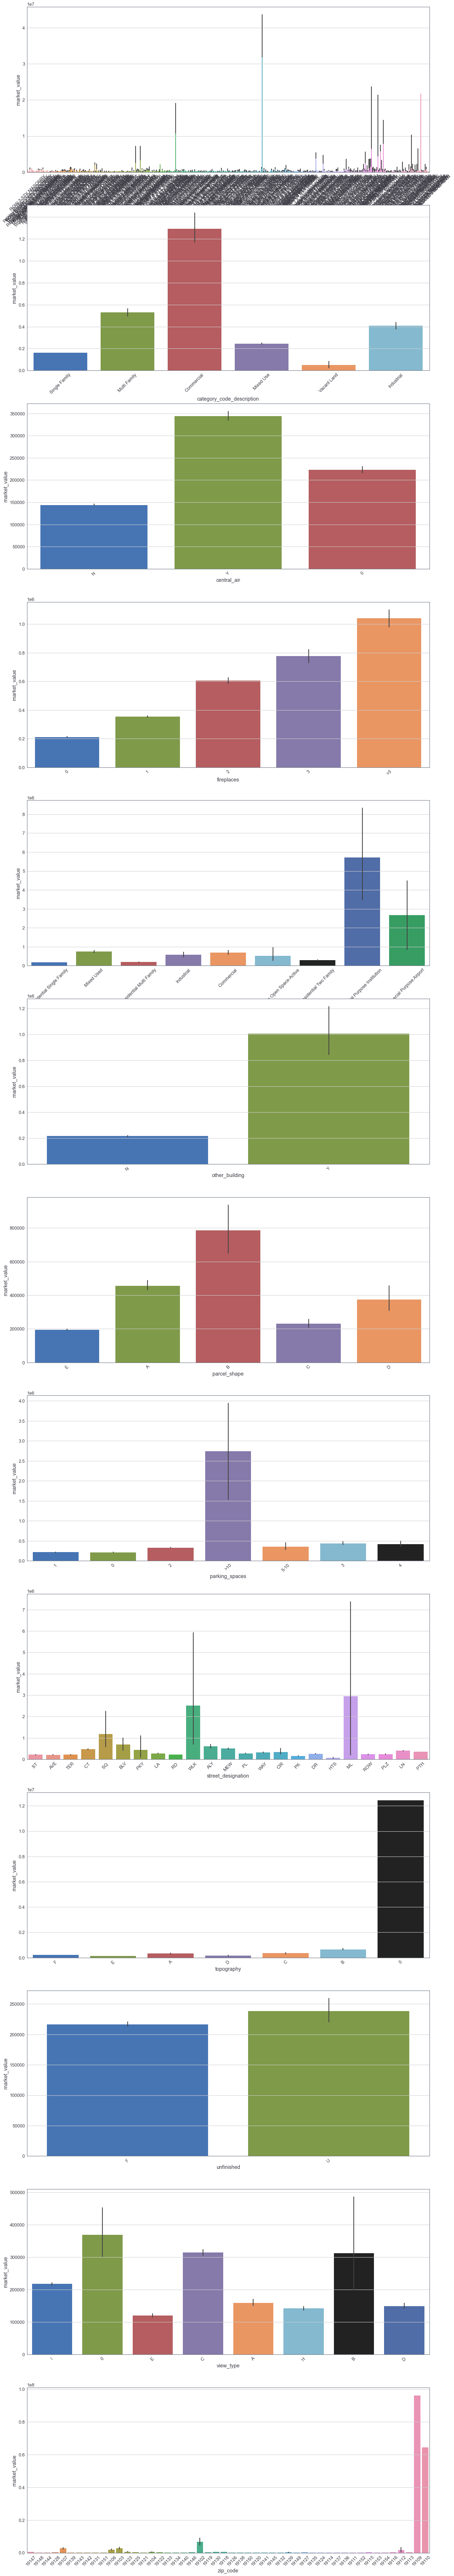

In [54]:
fig, ax = plt.subplots(13,1, figsize=(20,130))
for variable, subplot in zip(['building_code_description','category_code_description','central_air',
                              'fireplaces','new_zoning','other_building','parcel_shape','parking_spaces',
                              'street_designation','topography','unfinished','view_type','zip_code'], ax.flatten(), ):
    sns.barplot(data=df,x=variable,y='market_value', ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

# Data Pre-Processing

As already mention in the background before, the position that we choose is as an agent property. As a property agent we try to cut operation cost, one of the cost we try to reduce is cost from hiring some estimator property professional. In order to achieve that, we will make a automated machine prediction for estimating property price. Machine learning algorithm that we use in this case is regression model algorithm since the target is numerical type. 

After cleansing the data, analyze data using EDA and oulier anlysis, finally we have 21 columns and 484.743 rows data for modelling purposes.

- **Label**: `market_value`


- **Feature**:
- **(Numerical)**
1. number_of_bedrooms
2. number_of_rooms
3. number_stories
4. overall_condition
5. property_age
6. sale_year
7. total_area
8. total_livable_area
- **(Categorical)**
9. building_code_description
10. category_code_description
11. central_air
12. fireplaces
13. new_zoning
14. other_building
15. parcel_shape
16. parking_spaces
17. street_designation
18. topography
19. unfinished
20. view_type
21. zip_code 

In [55]:
df_model=df[['number_of_bedrooms','number_of_rooms','number_stories','overall_condition','property_age','sale_year',
             'total_area','total_livable_area','building_code_description','category_code_description','central_air',
             'fireplaces','new_zoning','other_building','parcel_shape','parking_spaces','street_designation','topography',
             'unfinished','view_type','zip_code']]
df_model

,number_of_bedrooms,number_of_rooms,number_stories,overall_condition,property_age,sale_year,total_area,total_livable_area,building_code_description,category_code_description,central_air,fireplaces,new_zoning,other_building,parcel_shape,parking_spaces,street_designation,topography,unfinished,view_type,zip_code
0,4.0,7.0,3.0,5.0,100.0,1951.0,779.0,1650.0,ROW W/GAR 3 STY MASONRY,Single Family,N,0,Residential Single Family,N,E,1,ST,F,F,I,19147
1,3.0,4.0,3.0,2.0,100.0,2017.0,779.1,1203.0,ROW 3 STY MASONRY,Single Family,Y,0,Residential Single Family,N,E,0,ST,F,F,I,19147
2,4.0,5.0,2.0,4.0,100.0,1975.0,725.2,1482.0,ROW 3 STY MASONRY,Single Family,N,0,Residential Single Family,N,E,0,ST,F,F,I,19147
3,4.0,8.0,2.0,4.0,100.0,2012.0,1433.0,2049.0,ROW 3 STY MASONRY,Single Family,Y,0,Residential Single Family,N,E,0,ST,F,F,I,19147
4,4.0,6.0,3.0,4.0,100.0,2017.0,1500.0,1155.0,ROW 3 STY MASONRY,Single Family,N,0,Residential Single Family,N,E,0,ST,F,F,I,19147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484738,3.0,6.0,3.0,1.0,5.0,2015.0,1041.6,1854.0,RES CONDO 3 STY MAS+OTH,Single Family,Y,0,Residential Single Family,N,E,1,ST,F,F,I,19122
484739,3.0,5.0,3.0,1.0,5.0,2015.0,1041.6,1571.0,RES CONDO 3 STY MAS+OTH,Single Family,Y,0,Residential Single Family,N,E,1,ST,F,F,I,19122
484740,2.0,4.0,3.0,1.0,5.0,2015.0,810.0,1041.0,RES CONDO 3 STY MAS+OTH,Single Family,Y,0,Residential Single Family,N,E,1,ST,F,F,I,19122
484741,2.0,4.0,3.0,1.0,5.0,2018.0,810.0,1134.0,RES CONDO 3 STY MAS+OTH,Single Family,Y,0,Residential Single Family,N,E,1,ST,F,F,I,19122


## Data Transformer (Encoding, Scaling)

**`Pre-Processing Scheme`**

Label: `market_value`

**Features:  
Categorical:**  
**`Binary encoding`**
1. building_code_description; 444 unique value
2. category_code_description; 6 unique value
3. fireplaces; 5 unique value
4. new_zoning; 11 unique value
5. parcel_shape; 5 unique value
6. parking_spaces; 7 unique value
7. street_designation; 23 unique value
8. topography; 7 unique value
9. view_type; 8 unique value
10. zip_code; 52 unique value

**`One hot encoding`**
1. central_air; 3 unique value
2. other_building; 2 unique value
3. unfinished; 2 unique value

**Numeric:**  
**`Scaling`**:
1. total_area
2. total_livable_area
3. property_age

**`Do not preprocesed:`**
1. number_of_bedrooms
2. number_of_rooms
2. number_stories 
3. overall_condition
4. sale_year

In [56]:
transformer= ColumnTransformer([
    ('one hot', OneHotEncoder(drop='first'),['central_air','other_building','unfinished']),
    ('binary', ce.BinaryEncoder(),['building_code_description','category_code_description','fireplaces','new_zoning',
                                   'parcel_shape','parking_spaces','street_designation','topography','view_type','zip_code']),
    ('scaling', RobustScaler(),['total_area','total_livable_area','property_age'])
], remainder='passthrough')

In [57]:
transformer.fit_transform(df_model)

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 5.000e+00,
        1.951e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.000e+00, 2.000e+00,
        2.017e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 4.000e+00,
        1.975e+03],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.000e+00, 1.000e+00,
        2.015e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 3.000e+00, 1.000e+00,
        2.018e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.000e+00, 2.000e+00,
        2.019e+03]])

## Data Splitting

In [58]:
y=df['market_value']
x=df_model

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2020)

## Pipeline Function

In [60]:
#For this modelling we choose these three model for cross-validation (model-benchmarking)
linreg=LinearRegression()
forest=RandomForestRegressor(random_state=2020)
xgb=XGBRegressor(random_state=2020)

In [61]:
linreg_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',linreg)
])
forest_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',forest)
])
xgb_pipe=Pipeline([
    ('preprocessing',transformer),
    ('model',xgb)
])

# Cross Validation (Model Benchmarking)

In regression model there are more than one evaluation metric that we can use to evaluate our model, those are:
1. R-squared
2. Mean squared error (MSE)
3. Root mean squared error (RMSE)
4. Mean absolute error (MAE)
5. Mean absolute percentage error (MAPE)

Selection process of evaluation method must be adjust with the business problem that we try to solve. In this case where market_value (numerical value) is the target, so we need evaulation metric which can provide exact error value and don't forget that market_value cannot be in negative value (always positive). So we choose mean absolute error (MAE) and mean absolute percentage error (MAPE) as metric evaluation. There is another consideration to choose evaluation metric, we need to know range value of the target. In this modelling data, market_value has a wide range value start from 5.500 to 1.500.000, to avoid bias in evaluation metric/error so we choose `mean absolute error (MAE)` as main evaluation metric, because this metric can well adjust with those wide range target value and dont stick to fixed error value.

In [123]:
models=[linreg_pipe,forest_pipe,xgb_pipe]
score=[]
mean_score=[]
std_score=[]

for i in models:
    model_cv=cross_val_score(i,x_train,y_train,scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)
    score.append(model_cv)
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())

pd.DataFrame({
    'model': ['LinReg','Forest','XGB'],
    'mean': mean_score,
    'std': std_score
})

,model,mean,std
0,LinReg,-0.854621,0.034950
1,Forest,-0.144754,0.004472
2,XGB,-0.348973,0.013519


From cross validation above, we can see mean absolute percentage error (MAPE) of the Random Forest model has the lowest error score (14.47%) and the most stable (lowest standard deviation) from all models. This means the algorithm can reduce error so well, so for this model we choose `Random Forest Regressor` as selected base algorithm model.

# Random Forest Model Performance

In [124]:
jtplot.style(theme='monokai')

## Modelling Data

In [125]:
forest_pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['central_air',
                                                   'other_building',
                                                   'unfinished']),
                                                 ('binary', BinaryEncoder(),
                                                  ['building_code_description',
                                                   'category_code_description',
                                                   'fireplaces', 'new_zoning',
                                                   'parcel_shape',
                                                   'parking_spaces',
                                                   'street_designation',
                                       

In [126]:
y_pred_forest=forest_pipe.predict(x_test)

In [127]:
forest_result=pd.DataFrame({'Actual':y_test, 'Prediction': y_pred_forest})
forest_result

,Actual,Prediction
226485,154700.0,165529.000000
311690,119500.0,121600.000000
205634,117000.0,106129.000000
181505,108200.0,107637.000000
321063,235600.0,269417.000000
...,...,...
393274,98400.0,96466.000000
463670,310900.0,285734.666667
62967,48400.0,50584.000000
460148,100900.0,120807.000000


In [128]:
print("MAPE SCORE: ",mean_absolute_percentage_error(y_test,y_pred_forest))
print("MAE SCORE: ",mean_absolute_error(y_test,y_pred_forest))
print("MSE SCORE: ",mean_squared_error(y_test,y_pred_forest))
print("RMSE SCORE: ",np.sqrt(mean_squared_error(y_test,y_pred_forest)))
print ("R2 SCORE: ", r2_score(y_test,y_pred_forest))

MAPE SCORE:  0.13189944109111362
MAE SCORE:  36094.64084981334
MSE SCORE:  370977213985.95074
RMSE SCORE:  609078.988297865
R2 SCORE:  0.7217951203740047


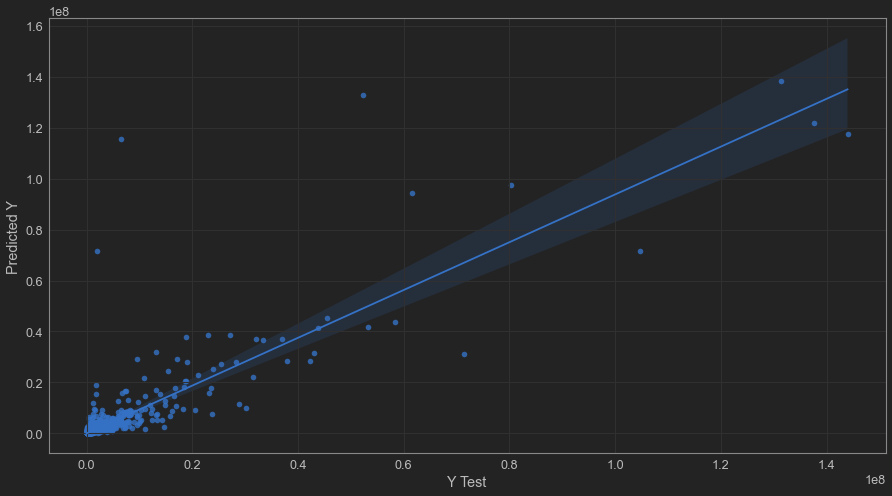

In [129]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred_forest,fit_reg=True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.savefig('model1.jpg')
plt.show()

# Random Forest Hyperparameter Tunning

In order to improve random forest model metric score, we will do some hyperparameter tunning in Randomized Search CV to cut processing time.

## Randomized Search CV

In [130]:
forest_pipe.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('one hot', OneHotEncoder(drop='first'),
                                    ['central_air', 'other_building',
                                     'unfinished']),
                                   ('binary', BinaryEncoder(),
                                    ['building_code_description',
                                     'category_code_description', 'fireplaces',
                                     'new_zoning', 'parcel_shape',
                                     'parking_spaces', 'street_designation',
                                     'topography', 'view_type', 'zip_code']),
                                   ('scaling', RobustScaler(),
                                    ['total_area', 'total_livable_area',
                                     'property_age'])])),
  ('model', RandomForestRegressor(random_state=2020))],
 'verbose': False,
 'preproc

In [131]:
# Choosing parameter
criterion=['squared_error','absolute_error']
max_depth=[2,3,4,5,6,7]
min_samples_leaf=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]
min_samples_split=[5,10,15,20,25,30,35,40,45,50,60,70,80,90,100]

forest_param={
    'model__criterion':criterion,
    'model__max_depth':max_depth,
    'model__min_samples_leaf':min_samples_leaf,
    'model__min_samples_split':min_samples_split,
}

In [132]:
#forest_grid= RandomizedSearchCV(
    #forest_pipe,
    #param_distributions=forest_param,
    #cv=3,
    #n_iter=10,
    #scoring='neg_mean_absolute_percentage_error',
    #n_jobs=-1
#)

In [133]:
#forest_grid.fit(x_train,y_train)

In [134]:
#print('best score', xgb_grid.best_score_)
#print('best param', xgb_grid.best_params_)

In [135]:
#pd.DataFrame(xgb_grid.cv_results_)

## Manual Tunning

In [136]:
#forest1=RandomForestRegressor(criterion='absolute_error', max_depth=3, min_samples_leaf=5, min_samples_split= 5, random_state=2020)
#forest_pipe1=Pipeline([
#    ('preprocessing',transformer),
#    ('model',forest1)
#])

In [137]:
#forest_pipe1.fit(x_train,y_train)

Unfortunately, our personal computer cannot handle this large amount of data. We try many tunning algorithm such as GridSearchCV, RandomizedSearchCV, and Manual Tunning yet we still cannot finished this tunning process. So we decide to use before tunning as final model in this case.

# Feature Importance

In [138]:
forest_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['central_air',
                                                   'other_building',
                                                   'unfinished']),
                                                 ('binary', BinaryEncoder(),
                                                  ['building_code_description',
                                                   'category_code_description',
                                                   'fireplaces', 'new_zoning',
                                                   'parcel_shape',
                                                   'parking_spaces',
                                                   'street_designation',
                                       

In [139]:
forest_pipe[0].transformers_[0][1].get_feature_names()
#Get feature name from One Hot Encoder

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_N', 'x0_Y', 'x1_Y', 'x2_U'], dtype=object)

In [140]:
forest_pipe[0].transformers_[1][1].get_feature_names()
#Get feature name from Binary Encoder

['building_code_description_0',
 'building_code_description_1',
 'building_code_description_2',
 'building_code_description_3',
 'building_code_description_4',
 'building_code_description_5',
 'building_code_description_6',
 'building_code_description_7',
 'building_code_description_8',
 'category_code_description_0',
 'category_code_description_1',
 'category_code_description_2',
 'fireplaces_0',
 'fireplaces_1',
 'fireplaces_2',
 'new_zoning_0',
 'new_zoning_1',
 'new_zoning_2',
 'new_zoning_3',
 'parcel_shape_0',
 'parcel_shape_1',
 'parcel_shape_2',
 'parking_spaces_0',
 'parking_spaces_1',
 'parking_spaces_2',
 'street_designation_0',
 'street_designation_1',
 'street_designation_2',
 'street_designation_3',
 'street_designation_4',
 'topography_0',
 'topography_1',
 'topography_2',
 'view_type_0',
 'view_type_1',
 'view_type_2',
 'view_type_3',
 'zip_code_0',
 'zip_code_1',
 'zip_code_2',
 'zip_code_3',
 'zip_code_4',
 'zip_code_5']

In [141]:
#Combine all of the feature name after encoding
features=list(forest_pipe[0].transformers_[0][1].get_feature_names()) + forest_pipe[0].transformers_[1][1].get_feature_names() + ['total_area',
            'total_livable_area','property_age','number_of_bedrooms','number_of_rooms','number_stories','overall_condition','sale_year']
features

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_N',
 'x0_Y',
 'x1_Y',
 'x2_U',
 'building_code_description_0',
 'building_code_description_1',
 'building_code_description_2',
 'building_code_description_3',
 'building_code_description_4',
 'building_code_description_5',
 'building_code_description_6',
 'building_code_description_7',
 'building_code_description_8',
 'category_code_description_0',
 'category_code_description_1',
 'category_code_description_2',
 'fireplaces_0',
 'fireplaces_1',
 'fireplaces_2',
 'new_zoning_0',
 'new_zoning_1',
 'new_zoning_2',
 'new_zoning_3',
 'parcel_shape_0',
 'parcel_shape_1',
 'parcel_shape_2',
 'parking_spaces_0',
 'parking_spaces_1',
 'parking_spaces_2',
 'street_designation_0',
 'street_designation_1',
 'street_designation_2',
 'street_designation_3',
 'street_designation_4',
 'topography_0',
 'topography_1',
 'topography_2',
 'view_type_0',
 'view_type_1',
 'view_type_2',
 'view_type_3',
 'zip_code_0',
 'zip_code_1',
 'zip_code_2',
 'zip_code_3',
 'zip_code_4',
 'zip_code_5',
 'total_are

In [142]:
importance_table=pd.DataFrame({'importance': forest_pipe[1].feature_importances_}, index=features)
importance_table.sort_values(by='importance', ascending=False)

,importance
total_livable_area,0.802235
number_stories,0.044862
property_age,0.036685
total_area,0.022272
overall_condition,0.013644
sale_year,0.012285
zip_code_0,0.009174
x0_Y,0.004811
number_of_rooms,0.004762
building_code_description_1,0.003793


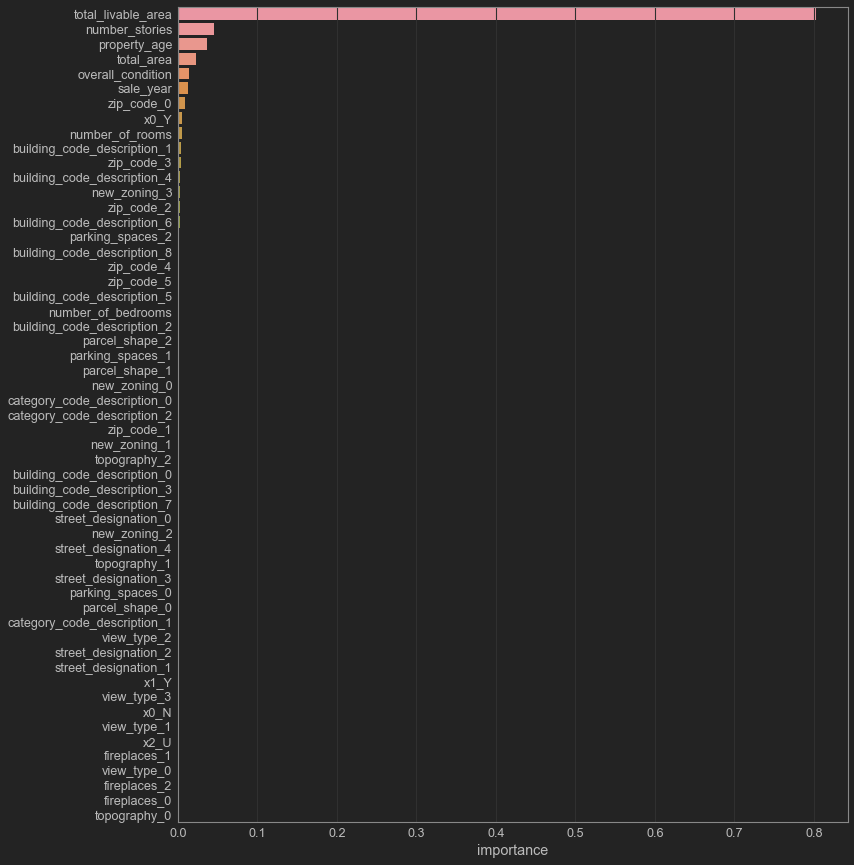

In [143]:
plt.figure(figsize=(12,15))
sns.barplot(data=importance_table.sort_values(by='importance', ascending=False), 
            x='importance', y=importance_table.sort_values(by='importance', ascending=False).index, orient='h')
plt.savefig('importance1.jpg')
plt.show()

From feature importance barplot above, we can see `total_livable_area` is the most importance feature. As we can see in the EDA, total_livable_area is highly correlated with market_value, this probably almost close to `feature leak`. Another highly importance feature sequentially is `number_stories`, `property_age`, `total_area`, `overall_condition`, `sale_year`. We think this feature importances are make sense with actual real world condition, because majority of the people will look for those features while searching property.

# Model Analysis

## General Analysis

In [144]:
print("MAPE SCORE: ",mean_absolute_percentage_error(y_test,y_pred_forest))
print("MAE SCORE: ",mean_absolute_error(y_test,y_pred_forest))
print("MSE SCORE: ",mean_squared_error(y_test,y_pred_forest))
print("RMSE SCORE: ",np.sqrt(mean_squared_error(y_test,y_pred_forest)))
print ("R2 SCORE: ", r2_score(y_test,y_pred_forest))

MAPE SCORE:  0.13189944109111362
MAE SCORE:  36094.64084981334
MSE SCORE:  370977213985.95074
RMSE SCORE:  609078.988297865
R2 SCORE:  0.7217951203740047


As we can see, this model has `mean_absolute_percentage_error(MAPE) around 13.189%` 
From this [reference](https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119199885.app1) we know that if the MAPE score is under 20% than it can be categorized as good and if it below 10% than it can be categorized as excellent. Our MAPE score show that the percentage of error is around 13,18% which mean our model has a good accuracy.

In [145]:
df_model.describe()

,number_of_bedrooms,number_of_rooms,number_stories,overall_condition,property_age,sale_year,total_area,total_livable_area
count,484743.000000,484743.000000,484743.000000,484743.000000,484743.000000,484743.000000,484743.000000,484743.000000
mean,3.230640,6.391487,2.138376,3.898997,84.549023,2003.618682,2386.139384,1867.523532
std,1.942856,3.739476,0.589126,0.706136,25.236293,14.652547,4578.071227,7465.982981
min,0.000000,0.000000,0.000000,0.000000,0.000000,1918.000000,600.000000,0.000000
25%,3.000000,6.000000,2.000000,4.000000,70.000000,1997.000000,981.250000,1107.000000
50%,3.000000,6.000000,2.000000,4.000000,95.000000,2007.000000,1379.700000,1290.000000
75%,3.000000,6.000000,2.000000,4.000000,100.000000,2015.000000,2185.700000,1649.000000
max,93.000000,154.000000,40.000000,7.000000,368.000000,2020.000000,99964.320000,798189.000000


In [146]:
df_model.describe(include=object)

,building_code_description,category_code_description,central_air,fireplaces,new_zoning,other_building,parcel_shape,parking_spaces,street_designation,topography,unfinished,view_type,zip_code
count,484743,484743,484743,484743,484743,484743,484743,484743,484743,484743,484743,484743,484743
unique,442,6,3,5,9,2,5,7,23,7,2,8,50
top,ROW 2 STY MASONRY,Single Family,0,0,Residential Single Family,N,E,0,ST,F,F,I,19143
freq,170951,417716,228035,471456,359456,484101,447942,287011,355336,451353,482799,457713,23664


** Limitation of The Model**
The plot above show us that most of the prediction is accurate or just have a small difference with the real value.  

This model has its own limitation, this model can only use inside these criterias:
1. 5500< market_value< 150.000.000
2. 0< number_of_bedrooms <93
3. 0< number_of_rooms <154
4. 0< number_stories <40
5. 0< property_age <368
6. 600< total_area <100.000
7. 600< total_livable_area <798.189

## Outlier Analysis

In [147]:
extreme_outliers(df['market_value'])

76800.0
211200.0
134400.0
-326400.0 is the lower threshold value for extreme outliers in data
614400.0 is the upper threshold value for extreme outliers in data
There are 15735 outliers in data
In percentage, there are  3.25 % outliers in this data


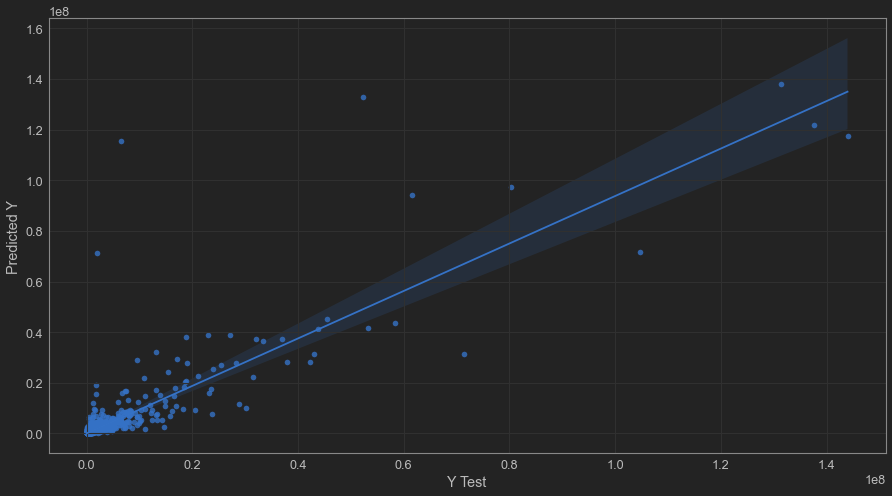

In [148]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred_forest,fit_reg=True)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

From plot between Y-Test and Predicted-Y above, we can see there are some outlier values. We analyze this data as outliers:
1. Value of Predicted Y above 20.000.000
2. Value of Y Test above 20.000.000           
This data need to be analyze further.

In [149]:
forest_result

,Actual,Prediction
226485,154700.0,165529.000000
311690,119500.0,121600.000000
205634,117000.0,106129.000000
181505,108200.0,107637.000000
321063,235600.0,269417.000000
...,...,...
393274,98400.0,96466.000000
463670,310900.0,285734.666667
62967,48400.0,50584.000000
460148,100900.0,120807.000000


In [183]:
forest_result[(forest_result['Actual']>20000000) | (forest_result['Prediction']>20000000)]

,Actual,Prediction,MAPE
475361,53301800.0,4.168126e+07,21.801410
460745,21000000.0,2.280079e+07,8.575195
474887,28227100.0,2.792019e+07,1.087281
480133,36912300.0,3.722167e+07,0.838116
458976,131371200.0,1.381841e+08,5.185960
453516,20551500.0,9.283820e+06,54.826558
452089,9455400.0,2.911209e+07,207.888476
474641,23756200.0,7.726066e+06,67.477686
451183,71425300.0,3.129168e+07,56.189636
460631,33330000.0,3.664149e+07,9.935466


In [184]:
#Outlier index
index_model=forest_result[(forest_result['Actual']>20000000) | (forest_result['Prediction']>20000000)].index

In [185]:
#We try to analyze these outlier based on top of the feature importance
A=df.loc[index_model,['building_code_description','exterior_condition','market_value','number_of_rooms','number_stories',
                   'total_area','total_livable_area','property_age']].sort_values(by='market_value', ascending=False)
A

,building_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age
473028,APTS 100+ UNITS MASONRY,1.0,143958400.0,101.5,34.0,26710.00,330183.0,7.0
479364,OFF BLD N/PKG N/COM MASON,4.0,137576900.0,5.5,21.0,22146.26,694386.0,30.0
458976,APTS 100+ UNITS MASONRY,4.0,131371200.0,101.5,20.0,50384.00,655699.0,55.0
459615,APTS 100+ UNITS MASONRY,4.0,104709300.0,101.5,25.0,27296.00,465000.0,68.0
458715,APTS 100+ UNITS MASONRY,1.0,80233800.0,101.5,25.0,16062.00,300000.0,6.0
451183,OFF BLD N/COM W/PKG MASON,4.0,71425300.0,4.0,1.0,87000.00,500000.0,87.0
458970,APTS 100+ UNITS MASONRY,1.0,61503000.0,101.5,24.0,30277.00,260172.0,1.0
474886,APTS 100+ UNITS MASONRY,1.0,58351700.0,101.5,5.0,85438.00,217524.0,11.0
475361,APTS 100+ UNITS MASONRY,4.0,53301800.0,101.5,16.0,13858.00,267023.0,113.0
459450,APTS 100+ UNITS MASONRY,4.0,52272400.0,101.5,20.0,78408.00,579185.0,63.0


In [186]:
A.join(forest_result)

,building_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Actual,Prediction,MAPE
473028,APTS 100+ UNITS MASONRY,1.0,143958400.0,101.5,34.0,26710.00,330183.0,7.0,143958400.0,1.176049e+08,18.306340
479364,OFF BLD N/PKG N/COM MASON,4.0,137576900.0,5.5,21.0,22146.26,694386.0,30.0,137576900.0,1.217933e+08,11.472538
458976,APTS 100+ UNITS MASONRY,4.0,131371200.0,101.5,20.0,50384.00,655699.0,55.0,131371200.0,1.381841e+08,5.185960
459615,APTS 100+ UNITS MASONRY,4.0,104709300.0,101.5,25.0,27296.00,465000.0,68.0,104709300.0,7.169296e+07,31.531427
458715,APTS 100+ UNITS MASONRY,1.0,80233800.0,101.5,25.0,16062.00,300000.0,6.0,80233800.0,9.734497e+07,21.326638
451183,OFF BLD N/COM W/PKG MASON,4.0,71425300.0,4.0,1.0,87000.00,500000.0,87.0,71425300.0,3.129168e+07,56.189636
458970,APTS 100+ UNITS MASONRY,1.0,61503000.0,101.5,24.0,30277.00,260172.0,1.0,61503000.0,9.421334e+07,53.184950
474886,APTS 100+ UNITS MASONRY,1.0,58351700.0,101.5,5.0,85438.00,217524.0,11.0,58351700.0,4.366056e+07,25.176888
475361,APTS 100+ UNITS MASONRY,4.0,53301800.0,101.5,16.0,13858.00,267023.0,113.0,53301800.0,4.168126e+07,21.801410
459450,APTS 100+ UNITS MASONRY,4.0,52272400.0,101.5,20.0,78408.00,579185.0,63.0,52272400.0,1.329256e+08,154.294039


In [187]:
A.join(forest_result).sort_values(by='total_livable_area', ascending=False)

,building_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Actual,Prediction,MAPE
479364,OFF BLD N/PKG N/COM MASON,4.0,137576900.0,5.5,21.0,22146.26,694386.0,30.0,137576900.0,1.217933e+08,11.472538
458976,APTS 100+ UNITS MASONRY,4.0,131371200.0,101.5,20.0,50384.00,655699.0,55.0,131371200.0,1.381841e+08,5.185960
451832,OFF BLD N/PKG N/COM MASON,4.0,6609500.0,5.5,4.0,55660.00,605528.0,120.0,6609500.0,1.154997e+08,1647.480551
459450,APTS 100+ UNITS MASONRY,4.0,52272400.0,101.5,20.0,78408.00,579185.0,63.0,52272400.0,1.329256e+08,154.294039
451183,OFF BLD N/COM W/PKG MASON,4.0,71425300.0,4.0,1.0,87000.00,500000.0,87.0,71425300.0,3.129168e+07,56.189636
459615,APTS 100+ UNITS MASONRY,4.0,104709300.0,101.5,25.0,27296.00,465000.0,68.0,104709300.0,7.169296e+07,31.531427
480988,APTS 100+ UNITS MASONRY,2.0,2068000.0,101.5,10.0,53335.00,380040.0,91.0,2068000.0,7.147171e+07,3356.078917
473028,APTS 100+ UNITS MASONRY,1.0,143958400.0,101.5,34.0,26710.00,330183.0,7.0,143958400.0,1.176049e+08,18.306340
458715,APTS 100+ UNITS MASONRY,1.0,80233800.0,101.5,25.0,16062.00,300000.0,6.0,80233800.0,9.734497e+07,21.326638
475492,APTS DORMITORY MASONRY,4.0,27149900.0,16.0,5.0,47310.00,294290.0,50.0,27149900.0,3.876653e+07,42.787016


In [188]:
A.join(forest_result).sort_values(by='total_area', ascending=False)

,building_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Actual,Prediction,MAPE
459014,APTS 100+ UNITS MASONRY,4.0,10896100.0,101.5,7.0,92974.00,201130.0,79.0,10896100.0,2.190793e+07,101.062114
451183,OFF BLD N/COM W/PKG MASON,4.0,71425300.0,4.0,1.0,87000.00,500000.0,87.0,71425300.0,3.129168e+07,56.189636
474886,APTS 100+ UNITS MASONRY,1.0,58351700.0,101.5,5.0,85438.00,217524.0,11.0,58351700.0,4.366056e+07,25.176888
460444,APTS 100+ UNITS MASONRY,2.0,18833800.0,101.5,18.0,85173.00,197925.0,60.0,18833800.0,3.799402e+07,101.733161
459450,APTS 100+ UNITS MASONRY,4.0,52272400.0,101.5,20.0,78408.00,579185.0,63.0,52272400.0,1.329256e+08,154.294039
452096,SCHOOL 5 STY MASONRY,4.0,23218300.0,4.0,5.0,70520.00,132400.0,93.0,23218300.0,1.580722e+07,31.919128
451832,OFF BLD N/PKG N/COM MASON,4.0,6609500.0,5.5,4.0,55660.00,605528.0,120.0,6609500.0,1.154997e+08,1647.480551
480988,APTS 100+ UNITS MASONRY,2.0,2068000.0,101.5,10.0,53335.00,380040.0,91.0,2068000.0,7.147171e+07,3356.078917
460463,APTS 100+ UNITS MASONRY,3.0,42205400.0,101.5,7.0,52410.00,163400.0,12.0,42205400.0,2.827852e+07,32.997863
452643,HEALTH FAC CLINIC MAS+OTH,4.0,18837100.0,7.0,4.5,51317.40,146048.0,32.0,18837100.0,2.051750e+07,8.920715


From dataframes above we can see all of the buildings are Apartment Masonry with many rooms and high of number stories. Majority of the prediction miss very far from actual value, this condition should be an issue and consideration for limitation and upgrading the models. Maybe this model is not suitable to predict property with market value above 20.000.000.

## Error Analysis

Based on literature (https://onlinelibrary.wiley.com/doi/pdf/10.1002/9781119199885.app1), a model categorized as a good model if MAPE score between 10-20%, so 20% is th threshold for a good model.Now we must check data which exceed 20% of the error value and analyze why that can be happen.

In [189]:
forest_result['MAPE']=abs(forest_result['Prediction']-forest_result['Actual'])/forest_result['Actual']*100

In [190]:
# There are 21053 data which exceed error value
B=forest_result[forest_result['MAPE']>20].drop(columns='Actual', axis=1)

In [191]:
index_model2=B.index

In [192]:
#We try to analyze these outlier based on top of the feature importance
C=df.loc[index_model2,['building_code_description','category_code_description','exterior_condition','market_value','number_of_rooms','number_stories',
                   'total_area','total_livable_area','property_age']].sort_values(by='market_value', ascending=False)
C

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age
459615,APTS 100+ UNITS MASONRY,Multi Family,4.0,104709300.0,101.5,25.0,27296.00,465000.0,68.0
458715,APTS 100+ UNITS MASONRY,Multi Family,1.0,80233800.0,101.5,25.0,16062.00,300000.0,6.0
451183,OFF BLD N/COM W/PKG MASON,Commercial,4.0,71425300.0,4.0,1.0,87000.00,500000.0,87.0
458970,APTS 100+ UNITS MASONRY,Multi Family,1.0,61503000.0,101.5,24.0,30277.00,260172.0,1.0
474886,APTS 100+ UNITS MASONRY,Multi Family,1.0,58351700.0,101.5,5.0,85438.00,217524.0,11.0
...,...,...,...,...,...,...,...,...,...
102115,ROW 2 STY MASONRY,Single Family,7.0,7000.0,4.0,2.0,910.00,962.0,100.0
255982,ROW 2 STY MASONRY,Single Family,4.0,6900.0,6.0,2.0,1096.00,1024.0,67.0
217745,ROW 2 STY MASONRY,Single Family,7.0,6900.0,6.0,2.0,695.50,1100.0,100.0
157710,ROW 2 STY MASONRY,Single Family,7.0,6900.0,6.0,2.0,698.85,930.0,105.0


In [193]:
D=C.join(B)

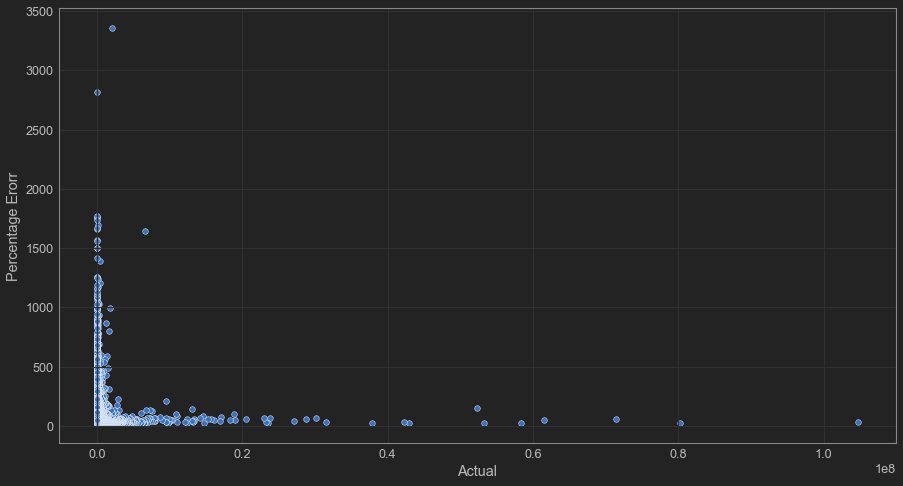

In [194]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='market_value', y='MAPE',data=D)
plt.xlabel('Actual')
plt.ylabel('Percentage Erorr')
plt.show()

In [195]:
D.describe()

,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Prediction,MAPE
count,14845.000000,1.484500e+04,14845.000000,14845.000000,14845.000000,14845.000000,14845.000000,1.484500e+04,14845.000000
mean,3.927518,3.406494e+05,6.768070,2.304345,3407.622481,3384.019198,91.957494,3.773685e+05,66.468383
std,1.094806,1.931815e+06,6.628678,0.828698,8002.722834,13851.179517,26.382662,2.375839e+06,110.938634
min,0.000000,6.800000e+03,0.000000,0.000000,600.000000,0.000000,0.000000,7.132000e+03,20.000543
25%,4.000000,6.050000e+04,6.000000,2.000000,944.000000,1158.000000,90.000000,8.437200e+04,26.417825
50%,4.000000,1.236000e+05,6.000000,2.000000,1309.000000,1530.000000,95.000000,1.467520e+05,36.732834
75%,4.000000,2.564000e+05,7.000000,3.000000,2252.170000,2308.000000,100.000000,2.769820e+05,61.088362
max,7.000000,1.047093e+08,140.000000,25.000000,98600.000000,605528.000000,340.000000,1.329256e+08,3356.078917


In [196]:
D.groupby('category_code_description').mean()

,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Prediction,MAPE
category_code_description,,,,,,,,,
Commercial,4.073832,1.076790e+06,4.740654,1.812617,11997.369813,10561.601869,86.197196,1.180282e+06,91.125483
Industrial,4.227642,3.870862e+05,4.214092,1.495935,15172.052168,13813.016260,84.178862,6.465455e+05,115.829400
Mixed Use,4.218780,2.387690e+05,6.139400,2.595353,1916.029855,2733.002904,97.260407,2.581340e+05,50.980296
Multi Family,3.800353,8.040973e+05,10.824372,2.825253,4634.311186,6927.076245,90.941825,9.062105e+05,72.767529
Single Family,3.900337,1.674319e+05,6.233703,2.239746,1942.937215,1514.804934,92.546959,1.759758e+05,61.959118
Vacant Land,3.400000,7.368000e+04,1.900000,1.700000,4396.361000,667.900000,83.000000,1.414254e+05,329.032859


From data descrption above, we can see vacant land and industrial has highly MAPE error. So we must check it.

In [197]:
D[(D['category_code_description']=='Vacant Land') | (D['category_code_description']=='Industrial')]

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Prediction,MAPE
477198,IND BLDG MINI WHSE MASON,Industrial,1.0,6014800.0,2.0,3.0,41356.00,72000.0,2.0,12539469.0,108.476907
479539,IND WAREHOUSE MASONRY,Industrial,4.0,3149600.0,4.0,1.0,53530.00,34770.0,45.0,2011804.0,36.125095
479266,IND WAREHOUSE MASONRY,Industrial,4.0,2907800.0,4.0,1.0,64907.00,22440.0,120.0,1423403.0,51.048800
477647,IND BLDG MINI WHSE MASON,Industrial,4.0,2856600.0,2.0,3.0,60541.00,123424.0,100.0,9372148.0,228.087517
477103,IND WAREHOUSE MASONRY,Industrial,5.0,2546400.0,4.0,2.0,12285.00,23000.0,120.0,797552.0,68.679233
...,...,...,...,...,...,...,...,...,...,...,...
57289,IND BLDG MINI WHSE MASON,Industrial,5.0,17200.0,6.0,1.0,7286.00,5115.0,80.0,285270.0,1558.546512
178428,VACANT LAND RESIDE < ACRE,Vacant Land,0.0,15400.0,0.0,2.0,1327.50,0.0,95.0,128278.0,732.974026
14400,VACANT LAND RESIDE < ACRE,Vacant Land,0.0,12800.0,6.0,0.0,1280.00,0.0,85.0,53637.0,319.039062
478575,IND WAREHOUSE MASONRY,Industrial,4.0,12100.0,8.0,1.0,14185.35,1200.0,90.0,121297.0,902.454545


In [198]:
D.groupby('category_code_description').describe()[['total_area','total_livable_area','number_stories','market_value']]

total_area                                      \
                               count          mean           std     min   
category_code_description                                                  
Commercial                    1070.0  11997.369813  16368.481605  614.72   
Industrial                     369.0  15172.052168  19887.094943  606.56   
Mixed Use                     1033.0   1916.029855   2125.001673  623.00   
Multi Family                  2269.0   4634.311186  10086.912654  607.00   
Single Family                10094.0   1942.937215   3520.909749  600.00   
Vacant Land                     10.0   4396.361000   9245.935650  700.00   

                                                                    \
                                 25%      50%         75%      max   
category_code_description                                            
Commercial                 2245.5000  5400.00  14245.8875  94703.0   
Industrial                 2696.0000  6497.50  19500.0000  98600.0   
Mixed Use                  1076.0000  1400.00   1940.6200  29425.0   
Multi Family               1232.0000  1754.39   3015.5200  92974.0   
Single Family               859.7550  1125.00   1714.7400  83000.0   
Vacant Land                1263.0575  1303.10   1831.8750  30655.0   

                          total_livable_area                              \
                                       count          mean           std   
category_code_description                                                  
Commercial                            1070.0  10561.601869  30460.291354   
Industrial                             369.0  13813.016260  23186.704728   
Mixed Use                             1033.0   2733.002904   1537.623250   
Multi Family                          2269.0   6927.076245  25631.065970   
Single Family                        10094.0   1514.804934    788.177496   
Vacant Land                             10.0    667.900000    843.616349   

                                                                     \
                             min     25%     50%      75%       max   
category_code_description                                             
Commercial                   0.0  2022.0  4126.5   9702.5  605528.0   
Industrial                   0.0  2190.0  5538.0  13875.0  209685.0   
Mixed Use                  784.0  1788.0  2358.0   3115.0   15180.0   
Multi Family               700.0  1728.0  2295.0   3360.0  579185.0   
Single Family              198.0  1074.0  1306.0   1705.0   21737.0   
Vacant Land                  0.0     0.0   225.0   1241.0    2385.0   

                          number_stories                                      \
                                   count      mean       std  min   25%  50%   
category_code_description                                                      
Commercial                        1070.0  1.812617  1.136881  0.0  1.00  2.0   
Industrial                         369.0  1.495935  0.780614  1.0  1.00  1.0   
Mixed Use                         1033.0  2.595353  0.579743  2.0  2.00  3.0   
Multi Family                      2269.0  2.825253  1.372517  1.0  2.00  3.0   
Single Family                    10094.0  2.239746  0.518155  1.0  2.00  2.0   
Vacant Land                         10.0  1.700000  1.059350  0.0  1.25  2.0   

                                     market_value                              \
                           75%   max        count          mean           std   
category_code_description                                                       
Commercial                 2.0  15.0       1070.0  1.076790e+06  3.311651e+06   
Industrial                 2.0   6.0        369.0  3.870862e+05  5.623076e+05   
Mixed Use                  3.0   7.0       1033.0  2.387690e+05  3.013950e+05   
Multi Family               3.0  25.0       2269.0  8.040973e+05  4.281286e+06   
Single Family              3.0   5.0      10094.0  1.674319e+05  2.245900e+05   
Vacant Land     

In [199]:
D.sort_values(by='MAPE', ascending=False)

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Prediction,MAPE
480988,APTS 100+ UNITS MASONRY,Multi Family,2.0,2068000.0,101.5,10.0,53335.00,380040.0,91.0,71471712.0,3356.078917
34834,ROW W/GAR 3 STY MASONRY,Single Family,4.0,59700.0,6.0,3.0,15714.50,21737.0,85.0,1741592.0,2817.239531
483751,ROW 3 STY MASONRY,Single Family,3.0,23600.0,7.0,3.0,1015.00,1709.0,100.0,441724.0,1771.711864
483759,ROW 3 STY MASONRY,Single Family,3.0,23600.0,6.0,3.0,944.00,1700.0,100.0,439874.0,1763.872881
477543,IND WAREHOUSE MASONRY,Industrial,5.0,76000.0,4.0,4.0,3054.22,12240.0,95.0,1411012.0,1756.594737
...,...,...,...,...,...,...,...,...,...,...,...
469473,STR/OFF+APT 2 STY MASONRY,Mixed Use,4.0,199700.0,6.0,2.0,1787.40,3492.0,85.0,239649.0,20.004507
295294,ROW 2 STY MASONRY,Single Family,4.0,235800.0,6.0,2.0,2286.00,1320.0,55.0,188630.0,20.004241
118488,ROW 2 STY MASONRY,Single Family,3.0,174700.0,4.0,2.0,626.00,750.0,90.0,139754.0,20.003434
449322,ROW W/OFF STR 2 STY MASON,Mixed Use,4.0,71400.0,5.0,2.0,898.15,1763.0,95.0,85681.0,20.001401


In [200]:
D[D['category_code_description']=='Single Family'].sort_values(by='MAPE', ascending=False)

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Prediction,MAPE
34834,ROW W/GAR 3 STY MASONRY,Single Family,4.0,59700.0,6.0,3.0,15714.50,21737.0,85.0,1741592.0,2817.239531
483751,ROW 3 STY MASONRY,Single Family,3.0,23600.0,7.0,3.0,1015.00,1709.0,100.0,441724.0,1771.711864
483759,ROW 3 STY MASONRY,Single Family,3.0,23600.0,6.0,3.0,944.00,1700.0,100.0,439874.0,1763.872881
482321,ROW 3 STY MASONRY,Single Family,1.0,23600.0,5.0,3.0,1183.77,1495.0,10.0,432633.0,1733.190678
481827,ROW 3 STY MASONRY,Single Family,3.0,23600.0,6.0,3.0,899.75,1467.0,27.0,415729.0,1661.563559
...,...,...,...,...,...,...,...,...,...,...,...
67135,ROW 3 STY MASONRY,Single Family,4.0,132300.0,7.0,3.0,1944.00,2157.0,140.0,158767.0,20.005291
78635,ROW B/GAR 3 STY MASONRY,Single Family,3.0,531100.0,7.0,3.0,1434.43,2016.0,25.0,637344.0,20.004519
295294,ROW 2 STY MASONRY,Single Family,4.0,235800.0,6.0,2.0,2286.00,1320.0,55.0,188630.0,20.004241
118488,ROW 2 STY MASONRY,Single Family,3.0,174700.0,4.0,2.0,626.00,750.0,90.0,139754.0,20.003434


In [202]:
D[D['category_code_description']=='Single Family'].sort_values(by='total_livable_area', ascending=False)

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,Prediction,MAPE
34834,ROW W/GAR 3 STY MASONRY,Single Family,4.0,59700.0,6.0,3.0,15714.50,21737.0,85.0,1741592.0,2817.239531
63959,DET 3 STY MASONRY,Single Family,4.0,252100.0,12.0,3.0,30310.80,10711.0,120.0,1001575.0,297.292741
43061,DET 2.5 STY MASONRY,Single Family,3.0,3410200.0,7.0,3.0,3750.00,9900.0,125.0,1529982.0,55.135124
148765,ROW 3 STY MASONRY,Single Family,6.0,1759300.0,10.0,3.0,5520.00,9460.0,4.0,1024803.0,41.749389
41464,ROW W/GAR 3 STY MASONRY,Single Family,3.0,3375000.0,6.0,3.0,6116.00,9176.0,100.0,1464015.0,56.621778
...,...,...,...,...,...,...,...,...,...,...,...
137489,PRIV GAR 1 STY MASONRY,Single Family,0.0,17400.0,5.5,1.0,1203.20,260.0,95.0,68198.0,291.942529
278664,PRIV GAR 1 STY MASONRY,Single Family,4.0,13400.0,5.5,1.0,720.00,200.0,75.0,34329.0,156.186567
400377,PRIV GAR 1 STY MASONRY,Single Family,4.0,7400.0,5.5,1.0,1299.40,200.0,95.0,58025.0,684.121622
277024,PRIV GAR 1 STY MASONRY,Single Family,4.0,13400.0,5.5,1.0,1026.21,200.0,95.0,31232.0,133.074627


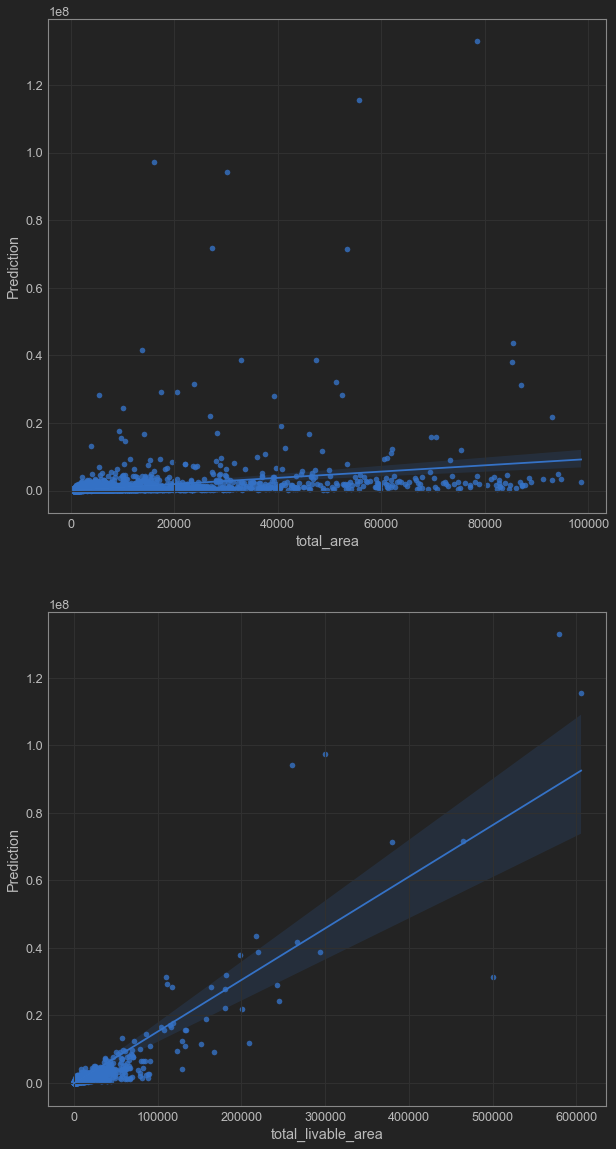

In [201]:
fig, ax = plt.subplots(2,1, figsize=(10,20))
for variable, subplot in zip(['total_area','total_livable_area'], ax.flatten()):
    sns.regplot(data=D, y='Prediction', x=variable, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

From data above we can analyze some information:
1. total_livable_area is highly correlated with prediction value, as we see in feature importance.
2. There are many outliers in total_area so we can't see clearly relationship with market value.
3. Many data aren't doesn't has right values, example: many vacant land has number_of_rooms and number_stories. This is not right, vacant land should only has total_area, the existance of these data especially in vacant land can cause prediction value higher than the actual value.
4. Many outlier has very high MAPE percentage, this error cause by high value in every feature data (data in feature high than the average) but the actual market_value are very low, so the model cannot predict market_value correctly and cause high value in MAPE. This could be external factor that model cannot predict (of course it called outliers).

## Error Analysis 2

In [203]:
C=df.loc[index_model2,['building_code_description','category_code_description','exterior_condition','market_value','number_of_rooms','number_stories',
                   'total_area','total_livable_area','property_age','sale_year']].sort_values(by='market_value', ascending=False)
C

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,sale_year
459615,APTS 100+ UNITS MASONRY,Multi Family,4.0,104709300.0,101.5,25.0,27296.00,465000.0,68.0,1999.0
458715,APTS 100+ UNITS MASONRY,Multi Family,1.0,80233800.0,101.5,25.0,16062.00,300000.0,6.0,2017.0
451183,OFF BLD N/COM W/PKG MASON,Commercial,4.0,71425300.0,4.0,1.0,87000.00,500000.0,87.0,1932.0
458970,APTS 100+ UNITS MASONRY,Multi Family,1.0,61503000.0,101.5,24.0,30277.00,260172.0,1.0,2016.0
474886,APTS 100+ UNITS MASONRY,Multi Family,1.0,58351700.0,101.5,5.0,85438.00,217524.0,11.0,2008.0
...,...,...,...,...,...,...,...,...,...,...
102115,ROW 2 STY MASONRY,Single Family,7.0,7000.0,4.0,2.0,910.00,962.0,100.0,2019.0
255982,ROW 2 STY MASONRY,Single Family,4.0,6900.0,6.0,2.0,1096.00,1024.0,67.0,2017.0
217745,ROW 2 STY MASONRY,Single Family,7.0,6900.0,6.0,2.0,695.50,1100.0,100.0,1986.0
157710,ROW 2 STY MASONRY,Single Family,7.0,6900.0,6.0,2.0,698.85,930.0,105.0,2015.0


In [204]:
D=C.join(B)

In [205]:
D.groupby('category_code_description').mean()

,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,sale_year,Prediction,MAPE
category_code_description,,,,,,,,,,
Commercial,4.073832,1.076790e+06,4.740654,1.812617,11997.369813,10561.601869,86.197196,1999.129907,1.180282e+06,91.125483
Industrial,4.227642,3.870862e+05,4.214092,1.495935,15172.052168,13813.016260,84.178862,2005.555556,6.465455e+05,115.829400
Mixed Use,4.218780,2.387690e+05,6.139400,2.595353,1916.029855,2733.002904,97.260407,2006.737657,2.581340e+05,50.980296
Multi Family,3.800353,8.040973e+05,10.824372,2.825253,4634.311186,6927.076245,90.941825,2005.924196,9.062105e+05,72.767529
Single Family,3.900337,1.674319e+05,6.233703,2.239746,1942.937215,1514.804934,92.546959,2005.601446,1.759758e+05,61.959118
Vacant Land,3.400000,7.368000e+04,1.900000,1.700000,4396.361000,667.900000,83.000000,1992.300000,1.414254e+05,329.032859


In [206]:
D[(D['sale_year']==2006) | (D['sale_year']==2007) | (D['sale_year']==2008) | (D['sale_year']==2009) | 
   (D['sale_year']==2010) | (D['sale_year']==2011) | (D['sale_year']==2012)].sort_values(by='MAPE',ascending=False)

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,sale_year,Prediction,MAPE
477543,IND WAREHOUSE MASONRY,Industrial,5.0,76000.0,4.0,4.0,3054.22,12240.0,95.0,2011.0,1411012.0,1756.594737
482321,ROW 3 STY MASONRY,Single Family,1.0,23600.0,5.0,3.0,1183.77,1495.0,10.0,2010.0,432633.0,1733.190678
216823,APT 2-4 UNITS 3 STY MASON,Multi Family,2.0,20300.0,9.0,3.0,994.80,2583.0,9.0,2011.0,359275.0,1669.827586
57289,IND BLDG MINI WHSE MASON,Industrial,5.0,17200.0,6.0,1.0,7286.00,5115.0,80.0,2006.0,285270.0,1558.546512
483981,APT 2-4 UNITS 4 STY MASON,Multi Family,4.0,42000.0,13.0,4.0,1340.00,2700.0,11.0,2008.0,530166.0,1162.300000
...,...,...,...,...,...,...,...,...,...,...,...,...
470884,STORE 2 STY MASONRY,Commercial,5.0,106500.0,6.0,2.0,797.00,2520.0,95.0,2010.0,127822.0,20.020657
136160,ROW 2 STY MASONRY,Single Family,4.0,118500.0,6.0,2.0,754.00,862.0,95.0,2006.0,94779.0,20.017722
78635,ROW B/GAR 3 STY MASONRY,Single Family,3.0,531100.0,7.0,3.0,1434.43,2016.0,25.0,2012.0,637344.0,20.004519
469473,STR/OFF+APT 2 STY MASONRY,Mixed Use,4.0,199700.0,6.0,2.0,1787.40,3492.0,85.0,2012.0,239649.0,20.004507


In [207]:
D[D['sale_year']==2020].sort_values(by='MAPE',ascending=False)

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,sale_year,Prediction,MAPE
458666,APTS 5-50 UNITS MASONRY,Multi Family,2.0,440600.0,12.0,4.0,16000.00,64000.0,0.0,2020.0,5750194.0,1205.082615
60219,ROW 2 STY MASONRY,Single Family,7.0,38500.0,7.0,3.0,5390.40,5152.0,25.0,2020.0,305612.0,693.797403
30542,ROW 3 STY MASONRY,Single Family,6.0,11100.0,6.0,3.0,2400.00,1790.0,105.0,2020.0,85240.0,667.927928
62261,DET W/GAR 3 STY MASONRY,Single Family,7.0,78300.0,7.0,3.0,36618.17,8520.0,60.0,2020.0,438445.0,459.955300
63781,ROW 3 STY MASONRY,Single Family,7.0,19200.0,6.0,3.0,1126.40,1470.0,95.0,2020.0,76845.0,300.234375
...,...,...,...,...,...,...,...,...,...,...,...,...
313161,ROW CONV/APT 2 STY MASON,Multi Family,5.0,95700.0,7.0,2.0,2369.70,1656.0,70.0,2020.0,115115.0,20.287356
29910,ROW 2.5 STY MASONRY,Single Family,3.0,399800.0,7.0,2.0,1602.00,1215.0,100.0,2020.0,318812.0,20.257129
212637,ROW 2 STY MASONRY,Single Family,3.0,286100.0,5.0,2.0,832.00,1270.0,95.0,2020.0,343808.0,20.170570
92730,ROW 3 STY MASONRY,Single Family,4.0,303400.0,6.0,3.0,644.00,1368.0,100.0,2020.0,242407.0,20.103164


In [208]:
D[D['sale_year']<1955].sort_values(by='MAPE',ascending=False)

,building_code_description,category_code_description,exterior_condition,market_value,number_of_rooms,number_stories,total_area,total_livable_area,property_age,sale_year,Prediction,MAPE
451309,HSE WORSHIP ALL 2 STY MAS,Commercial,4.0,164600.0,7.0,2.0,20542.00,20262.0,95.0,1932.0,2094693.0,1172.595990
451467,PKG LOT COM W/ATT BTH FRM,Commercial,4.0,63900.0,0.0,0.0,3729.70,5928.0,110.0,1943.0,486322.0,661.067293
454881,HSE WORSHIP ALL 1 STY MAS,Commercial,4.0,87500.0,4.0,1.0,12105.00,4220.0,90.0,1943.0,496597.0,467.539429
451878,HSE WORSHIP ALL 1 STY MAS,Commercial,5.0,771400.0,4.0,3.0,46455.53,12983.0,130.0,1943.0,4331770.0,461.546539
451516,HSE WORSHIP ALL 1 STY MAS,Commercial,4.0,541500.0,4.0,1.0,23200.00,18250.0,100.0,1943.0,3012507.0,456.326316
...,...,...,...,...,...,...,...,...,...,...,...,...
480952,OFF BLD COM NO GAR MASON,Commercial,3.0,2820500.0,4.0,2.0,12750.00,18360.0,52.0,1943.0,2238478.0,20.635419
60794,ROW 2 STY MASONRY,Single Family,4.0,44400.0,6.0,2.0,1216.21,1379.0,81.0,1954.0,53507.0,20.511261
451367,SCHOOL 3 STY MASONRY,Commercial,4.0,3713400.0,6.0,3.0,28655.00,35691.0,95.0,1943.0,4469076.0,20.349976
5335,ROW 2 STY MASONRY,Single Family,4.0,218000.0,6.0,2.0,607.50,944.0,100.0,1943.0,173737.0,20.304128


There are worldwide external factor that can affectt market value as:
1. World War 2
2. Economic Crisis (2007-2010)
3. Covid Pandemic (2020)               
This is why so many data in this years has higher MAPE value than in other years. Majority of the actual market_value in this years tend to lower than same specification of property in different outside those years.

# Model Summary and Recommendation

**Summary**
- This model has a purpose to predict market_value of the property in Philadelphia City 
- Feature have 21 columns and 484.743 rows data for modelling purposes.
- **Feature**:
- **(Numerical)**
1. number_of_bedrooms
2. number_of_rooms
3. number_stories
4. overall_condition
5. property_age
6. sale_year
7. total_area
8. total_livable_area
- **(Categorical)**
9. building_code_description
10. category_code_description
11. central_air
12. fireplaces
13. new_zoning
14. other_building
15. parcel_shape
16. parking_spaces
17. street_designation
18. topography
19. unfinished
20. view_type
21. zip_code 
- Based on bussiness case, we choose mean absolute percentage error (MAPE) as metric evaluation.
- Based on Cross Validation of three models (Linear Regression, Random Forest, XGBoost), we choose Random Forest model, because it has the lowest error score (14.47%) and the most stable (lowest standard deviation).
- Unfortunately we cannot use hyperparameter tunning for upgrade the model, because our personal laptop cannot process these enormouse data quickly.
- We use base model to test the data and we get MAPE SCORE:  0.13189944109111362.
- `total_livable_area` is the most importance feature and then followed by `number_stories`, `property_age`, `total_area`, `overall_condition`, `sale_year` respectively.

**Recommendation**
From the result our model still have gap to improve:
1. Doing improvement by doing hyperparameter tuning.
2. Read more literature to know more about the domain knowledge, this will reduce the assumption with fact.
3. Deepen the feature analysis and take a look the relation between feature-feature and feature-label
4. Doing several combination change like extracting, simplify and re-categorize to get more model and get better result.
5. Doing normalization to the feature, this can make us have more model option and get better result.